# *PART1* 파이토치 기초
### CNN모델 구조별 정확도와 파라미터 수 비교 그래프

각 원의 크기는 파라미터 수를 의미하며 가장 큰 원은 1억 5000만 개의 파라미터로 구성된 모델

VGG 계열 모델의 파라미터 수가 매우 많다. 흔히 파라미터 수가 많으면 그만큼 표현할 수 있는 능력이 높아지기 때문에 성능이 향상될 것이라 생각하지만 과적합의 문제로 학습에 이용되는 데이터에 대해서는 Task를 잘 수행할 수 있지만, 학습에 이용되지 않은 새로운 데이터에 대해서는 task를 잘 수행할 수 없는 현상이 발생

따라서 파라미터 수를 무조건 늘리는 것이 중요한 것이 아니라 해당 Task를 수행하기 위해 적절한 수의 파라미터 수를 할당하고 학습에 이용되지 않는 데이터에 대해서도 Task를 정확히 수행하기 위해 일반화 과정이 꼭 필요하다. 일반화 과정에는 보통 weight decay, dropout, batch normalization 등과 같은 기법이 사용됨

NASNet-A-Large 모델이 가장 높은 성능을 나타내고 있다. y축은 Top-1 Accuracy, top-5 Accuracy

Top-1 Accuracy은 모델의 예측한 결과값 중 가장 높은 확률로 예측한 클래스가 실제 클래스와 동일한지를 평가하는 엄격한 기준

Top-5 Accuracy는 모델의 예측한 결과값 중 상위 5개의 확률에 대해 실제 클래스가 포함되는지를 평가하는 비교적 덜 엄격한 기준

y축을 보면 가장 높은 Top-1 Accuracy 수치는 80 수준, 가장 높은 Top-5 Accuracy 수치는 95 수준이다.

즉, 그래프상에서 원의 크기가 작고 성능이 높은 모델이 가장 좋다. 동일한 성능을 나타내는 모델에 대해 파라미터 수가 적을수록 계산해야 하는 변수가 적어지기 때문에 계산양을 줄일 수 있다. 파라미터 수가 비슷하다면 성능이 높은 것이 당연히 좋다.

x축은 G-FLOPs를 의미하고 G-FLOPs는 GPU FLoating Operations Per Second의 약자이다. 이는 초당 부동소수점 연산을 의미하며 흔히 GPU의 성능을 측정하는 요소이다. 각 모델을 학습하는 데 필요한 GPU의 성능을 의미한다. 가장 높은 성능을 보이고 상대적으로 적은 수치의 파라미터 값을 갖는 NASNet-A-Large 모델을 얻기 위해서는 그래프 내에 제시된 모델 중에서도 가장 좋은 성능을 갖고 있는 GPU를 이용했다고 볼 수 있다.

많은 수의 파라미터를 이용해 모델을 설계할 때는 CPU보다 GPU가 훨씬 빨리 계산된다. CPU는 GPU에 비해 고차원의 일을 수행하는 능력을 가졌지만, 너무 많은 수의 파라미터 값을 계산하기에는 느리다. 하지만 GPU를 이용하면 파라미터 값을 병렬적으로 빠르게 계산할 수 있다.

### **1.4 반드시 알아야 하는 파이토치 스킬**
#### 4.1 tensor
##### 1) scalar

스칼라는 우리가 흔히 알고 있는 상숫값이다. 즉, 하나의 값을 표현할 때 1개의 수치로 표현한 것이다. 

In [ ]:
import torch

vector1 = torch.tensor([1.,2.,3.])
print(vector1) # tensor([1.,2.,3.])

vector2 = torch.tensor([4.,5.,6.,])
print(vector2)

add_vector = vector1 + vector2
print(add_vector)

sub_vector = vector1 - vector2
print(sub_vector)

mul_vector = vector1 * vector2
print(mul_vector)

div_vector = vector1 / vector2
print(div_vector)

tensor([1., 2., 3.])
tensor([4., 5., 6.])
tensor([5., 7., 9.])
tensor([-3., -3., -3.])
tensor([ 4., 10., 18.])
tensor([0.2500, 0.4000, 0.5000])


In [ ]:
import torch

scalar1 = torch.tensor([1.])
print(scalar1)

scalar2 = torch.tensor([3.])
print(scalar2)

add_scalar = scalar1 + scalar2
print(add_scalar)

sub_scalar = scalar1 - scalar2
print(sub_scalar)

mul_scalar = scalar1 * scalar2
print(mul_scalar)

div_scalar = scalar1 / scalar2
print(div_scalar)

torch.add(scalar1, scalar2) # torch 내장 메서드를 통해 계산할 수 있다.
torch.sub(scalar1, scalar2)
torch.mul(scalar1, scalar2)
torch.div(scalar1, scalar2)

tensor([1.])
tensor([3.])
tensor([4.])
tensor([-2.])
tensor([3.])
tensor([0.3333])


tensor([0.3333])

##### 3) 행렬

행렬은 2개 이상의 벡터 값을 통합해 구성된 값. 벡터 값 간 연산 속도를 빠르게 진행할 수 있는 선형 대수의 기본 단위

In [ ]:
matrix1 = torch.tensor([[1.,2.],[3.,4.]])
matrix2 = torch.tensor([[5.,6.],[7.,8.]])

torch.add(matrix1, matrix2)

torch.sub(matrix1, matrix2)

torch.mul(matrix1, matrix2)

torch.div(matrix1, matrix2)

torch.matmul(matrix1,matrix2) # [[(1*5)+(2*7)],[(1*6)+(2*8)],[(3*5)+(4*7)],[(3*6)+(4*8)]], 행렬 곱 연산

tensor([[19., 22.],
        [43., 50.]])

##### 4) 텐서

행렬은 2차원의 배열이라 표현하지만 텐서는 2차원 이상의 배열을 표현

In [ ]:
tensor1 = torch.tensor([[[1.,2.], [3.,4.]],[[5.,6.],[7.,8.]]])
tensor2 = torch.tensor([[[9.,10.],[11.,12.]],[[13.,14.],[15.,16.]]])

sum_tensor = tensor1 + tensor2 # torch.add(tensor1,tensor2)
print(sum_tensor)

sub_tensor = tensor1 - tensor2 # torch.sub(tensor1,tensor2)
print(sub_tensor)

mul_tensor = tensor1 * tensor2 # torch.mul(tensor1,tnesor2)
print(mul_tensor)

div_tensor = tensor1 / tensor2 # torch.div(tensor1,tensor2)
print(div_tensor)

torch.matmul(tensor1,tensor2)

tensor([[[10., 12.],
         [14., 16.]],

        [[18., 20.],
         [22., 24.]]])
tensor([[[-8., -8.],
         [-8., -8.]],

        [[-8., -8.],
         [-8., -8.]]])
tensor([[[  9.,  20.],
         [ 33.,  48.]],

        [[ 65.,  84.],
         [105., 128.]]])
tensor([[[0.1111, 0.2000],
         [0.2727, 0.3333]],

        [[0.3846, 0.4286],
         [0.4667, 0.5000]]])


tensor([[[ 31.,  34.],
         [ 71.,  78.]],

        [[155., 166.],
         [211., 226.]]])

#### 4.2 autograd

back propagation을 이용해 파라미터를 업데이트하는 방법은 autograd 방식으로 쉽게 구현할 수 있도록 설정되어 있다. 

In [ ]:
import torch

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

BATCH_SIZE = 64     # 딥러닝 모델에서 파라미터를 업데이트할 때 계산되는 데이터의 개수, 
                    # 즉 batch_size 수만큼 데이터를 이용해 output을 계산하고 batch_size 수만큼 출력된 결괏값에 대한 오찻값을 계산, 
                    # batch_size 수만큼 계산된 오찻값을 평균해 back propagation을 적용하고 이를 바탕으로 파라미터를 업데이트한다. batch_size는 input으로 이용되는 데이터가 64개라는 것을 의미
INPUT_SIZE = 1000   # input의 크기이자 입력층의 노드 수를 의미, input_size는 딥러닝 모델에서의 입력층의 노드 수를 의미한다. 즉, 입력 데이터의 크기, 
                    # 즉, 1000크기의 벡터 값을 의미한다.따라서 1000크기의 벡터 값을 64개 이용한다는 의미이다. (64,1000)
HIDDEN_SIZE = 100   # input을 다수의 파라미터를 이용해 계산한 결과에 한 번 더 계산되는 파라미터 수. 즉, 입력층에서 은닉층으로 전달됐을 때 은닉층의 노드 수를 의미. 이 예제는 (64,1000)의 input들이 (1000,100) 크기의 행렬과 행렬 곱을 계산
OUTPUT_SIZE = 10    # 최종으로 출력되는 값의 벡터의 크기. 보통 output의 크기는 최종으로 비교하고자 하는 레이블의 크기와 동일하게 설정. 
                    # 예를 들어 10개로 분류하려면 크기가 10짜리의 원-핫 인코딩을 이용하기 때문에 output의 크기를 10으로 맞추기도 하며 5 크기의 벡터 값에 대해 mean squred error를 계산하기 위해 output의 크기를 5로 맞추기도 한다.
                    
# 더미 변수 : 0 또는 1만으로 표현되는 값으로 어떤 특징이 존재하는가 존재하지 않는가를 표시하는 독립변수이다. 더미 변수를 만드는 방법으로는 크게 두 가지, 원핫인코딩 방식과 축소랭크 방식이 있다.
# 원핫인코딩 : 해당하는 값에 대해서 맞으면 1, 아니면 0을 부여. 즉 고유값에 해당되는 특징에는 1, 나머지는 0
# 축소랭크 : 특정한 하나의 범주값을 기준값으로 설정하고, 기준값 더미변수의 가중치는 항상 1으로 놓는다. 기준값을 제외하고 해당하는 값에 대하여 맞으면 1, 아니면 0을 부여. 즉, 기준값은 1로 두고, 이를 제외하고 고유값에 해당되는 특징에 1을 부여


In [ ]:
DEVICE = torch.device('cpu')
BATCH_SIZE = 64
INPUT_SIZE = 1000
HIDDEN_SIZE = 100
OUTPUT_SIZE = 10

x = torch.randn(BATCH_SIZE,                   # input 설정                                              
                INPUT_SIZE,                   # randn 는 평균이 0, 표준편차가 1인 정규분포에서 샘플링한 값으로, 데이터를 만든다는 것. 즉 크기가 1000짜리의 벡터를 64개 만들기 위해 설정. x는 (64,1000)이 생성된다.
                device = DEVICE,              # DEVICE를 이용해 계산할 것이고
                dtype = torch.float,          # 데이터 형태는 float으로 설정
                requires_grad = False)        # input으로 이용되기 때문에 gradient를 계산할 필요가 없다. grad는 파라미터를 업데이트하기 위해 gradient를 계산하는 것이다.

y = torch.randn(BATCH_SIZE,                   # output도 위와 동일
                OUTPUT_SIZE,                  # output과의 오차를 계산하기 위해 output의 크기를 10으로 설정
                device = DEVICE,
                dtype = torch.float,
                requires_grad = False)

w1 = torch.randn(INPUT_SIZE,                  # 본격적으로 업데이터할 파라미터 값을 설정, 이 때 행렬 곱을 하기 위해 input의 데이터 크기가 10000이며 다음 행의 값이 1000이어야 한다.
                HIDDEN_SIZE,                  # 행렬 곱을 이용해 100 크기의 데이터를 생성하기 위해 (1000,100) 크기의 데이터를 생성
                device = DEVICE,
                dtype = torch.float,
                requires_grad = True)         # 파라미터를 업데이트해야 하기에 gradient를 한다.

w2 = torch.randn(HIDDEN_SIZE,                 # w2는 w1과 x를 행렬 곱한 결과에 계산할 수 있는 데이터여야 한다. w1과 x의 행렬 곱을 한 결과는 (1,100)이며, (100,10)행렬을 통해 output을 계산할 수 있도록 w2의 모양을 설정
                OUTPUT_SIZE,
                device = DEVICE,
                dtype = torch.float,
                requires_grad = True)

In [ ]:
learning_rate = 1e-6 # gardient를 계산한 결과값에 learning_rate만큼 곱한 값을 이용해 업데이트된다. 이를 learning rate라고 한다. 딥러닝 모델에서 파라미터 값을 업데이트할 때 가장 중요한 하이퍼파라미터이기도 함

for t in range(1,501):                        # 500번 반복해 파라미터 값을 업데이트하기 위해 반복문을 설정
  y_pred = x.mm(w1).clamp(min = 0).mm(w2)     # 딥러닝 모델의 결과값을 보통 예측값이라 표현한다. 딥러닝 모델의 input인 x와 w1 간의 행렬 곱을 이용해 나온 결과값을 계산. clamp라는 메서드를 이용해 비선형 함수를 적용
                                              # 층과 층 사이에 비선형 함수를 이용해 높은 표현력을 지니는 방정식을 얻게 된다. 
                                              # 여기서 clamp는 ReLU와 같은 역할. 최솟값은 0, 0보다 큰 값은 자기 자신을 갖게 되는 메서드, clamp를 이용해 계산된 결과와 w2를 이용해 행렬 곱을 한 번 더 계산
                                              # 행렬 곱을 한 결과는 딥러닝 모델에서의 output을 의미하며 이는 예측값이라고 표현되기 때문에 y_pred로 지정
  loss =(y_pred - y).pow(2).sum()             # 예측값과 실제 레이블 값을 비교해 오차를 계산한 값을 loss 라 한다. y_pred와 실제 레이블을 의미하는 y 간의 차잇값을 계산한 후 pow(제곱을 취함) 함수를 이용해 제곱을 취한다. 차를 제곱하여 합함
  if t % 100 == 0:                            # 반복문 횟수와 오차를 출력
    print("Iteration: ", t, "\t", "Loss: ", loss.item())
  loss.backward()                             # backward 를 사용하면 각 파라미터 값에 대해 gradient를 계산하고 이를 통해 back propagation을 진행한다는 것을 의미

  with torch.no_grad():
    w1 -= learning_rate * w1.grad             # w1의 gradient 값을 의미하는 w1.grad에 위에서 설정한 learning_rate값을 곱한 결괏값을 기존 w1에서 빼준다.
    w2 -= learning_rate * w2.grad             # 음수를 이용하는 이유는 loss 값이 최소로 계산될 수 있는 파라미터 값을 찾기 위해 gradient 값에 대한 반대 방향으로 계산한다는 것을 의미

    w1.grad.zero_()                           # 다음 반복문을 진행할 수 있도록 gradient 값을 0으로 설정
    w2.grad.zero_()

# 이때 반복할수록 loss 값이 줄어든다는 것은 input이 w1과 w2를 통해 계산된 결과값과 y 값이 점점 비슷해진다는 것, y 값과 비슷한 output을 계산할 수 있도록 w1과 w2가 계산된다는 것을 알 수 있다.

Iteration:  100 	 Loss:  507.2475280761719
Iteration:  200 	 Loss:  4.278642654418945
Iteration:  300 	 Loss:  0.08332622796297073
Iteration:  400 	 Loss:  0.002188140992075205
Iteration:  500 	 Loss:  0.00016944925300776958


# *PART2* AI Background

##  1. 인공지능이란?
컴퓨터가 데이터를 이용해 학습할 수 있도록 하는 기술

## 2. 머신러닝
### 2.1 머신러닝과 딥러닝
머신러닝: 행과 열이 존재하는 행렬(정형화된 데이터)을 이용해 예측 또는 분류하고 싶을 때 사용

딥러닝: 이미지 또는 텍스트와 같은 정형화돼 있지 않은(비정형 데이터) 데이터를 사용활 때는 사용

### 2.2 머신러닝의 종류
#### 2.2.1 모델학습
머신러닝 모델의 학습 목표는 '데이터(input)에 대한 모델의 결과(output)가 정답(label)에 가깝게 나오도록 학습시키는 것'이다.

방법에는 
1. 데이터를 모델에 넣고 결과를 냄
2. 결과를 정답과 비교해 다른 만큼 모델을 변경
3. 특정 조건이 만족할 때까지 1, 2를 반복

#### 2.2.2 손실 함수
위 2번 단계에서 모델의 결과값이 실제 정답과 차이를 수치화하고 그것을 함수화한 것을 손실함수(loss function) 또는 비용함수(cost function)이라 한다. 

다시 말해, 손실함수는 모델의 선택(결과)에 대해 얼마나 손실이 일어났는지를 정의하는 함수로 이 의미에 맞게 모델을 손실 함수의 값을 줄이는 방향으로 학습한다. 손실함수는 보통 스칼라(scalar)값으로 정의하는데, 모델이나 task에 따라 다양한 종류가 존재한다. loss를 어떻게 설정하느냐가 모델 학습의 중요한 핵심 요인이 되기도 한다. 손실 함수 중 가장 대표적인 함수로는 mean squared error(MSE)를 들 수 있다. 수식은 

* xi: ith data
* yi: ith data
* ^yi: ith output
* n: the number of data

MSE = 1/n sigma(i=1~n)(yi-^yi)^2

### 2.3 머신러닝의 구분
#### 2.3.1 지도학습
데이터와 결과가 주어지고 그를 바탕으로 예측하는 것

즉, 데이터와 결과가 무조건 존재해야 한다.

y=f(x) 에서 함수f를 머신러닝 모델이라 한다.

x를 독립 변수 또는 Feature, y를 종속 변수, 반응변수 또는 타깃변수라 한다.

지도학습 내에서도 두 가지로 나뉘어 
1. 회귀

y=f(x)에서 y가 실수형 값을 가질 때 풀어야 하는 문제를 '회귀' 문제, 이때의 함수 f를 회귀 모델이라 한다.

2. 분류

반면, 위 수식에서 y가 특정 class(성별, 흡연 유무 등 셀 수 있는 개수의 선택지를 가진 경우)를 가질 때 풀어야 하는 문제를 '분류' 문제라 하며 이때의 함수 f를 분류 모델이라 한다.

키를 이용해 몸무게를 예측하고 싶을 때 또는 아파트 가격이나 주식의 가격을 예측하고 싶을 때는 '회귀 모델'을, 비만여부, 아파트 또는 주식의 가격 상승 여부를 예측하고 싶을 때는 '분류 모델'을 고려해야 한다.

#### 2.3.2 비지도 학습
데이터는 제공하지만 정답은 제공하지 않는 학습 방법

독립 변수만으로 새로운 Feature를 찾아낸다거나 군집화하는 등 데이터 내에서 새로운 패턴을 찾아내는 것에 초점을 맞춘다. 

대표적 방법 - 군집화, 차원 축소법

#### 2.3.3 강화학습
수많은 시뮬레이션을 통해 컴퓨터가 현재 상태에서 어떤 행동을 취해야 먼 미래의 보상을 최대로 할 것인지를 학습하는 알고리즘

상태(state),행동(action), 보상(reward), 다음 상태(next state)가 있어야 한다. 즉, 시뮬레이션된 연속적인 데이터의 값이 존재해야 한다.

알파고에서 
*   현재 바둑판 - '현재 상태'
*   바둑의 수 - '행동'
*   바둑의 수를 두고 난 후의 바둑판 - '다음 행동'

보상은 이 수를 두면 이길지, 질지 알 수 없기에 기본적으로 0으로 두고 대국이 끝난 후에 이겼는지, 졌는지 여부로 부여한다. 대국이 끝나면 승패 여부로 과거에 뒀던 수가 좋은 수인지, 나쁜 수 인지 알 수 있다. 

### 2.4 지도학습 모델의 종류
#### 2.4.1 선형 회귀 모델
y=ax+b 와 같은 형태로 X를 이용해 Y를 예측

독립 변수 하나만으로 종속 변수를 예측하는 모델을 '단순 선형 회귀 모델'이라 하고, 변수가 여러 개일 때 적합시키는 회귀 모델을 다중 선형 회귀 모델, 선형 회귀 모델은 우수하지는 않지만 변수의 설명력 측면에서는 장점

#### 2.4.2 회귀 계수 축소 모델
변수가 많을수록 회귀 모델의 성능이 낮아진다. 각각의 독립 변수가 지니고 있는 설명력을 중복으로 가져가지 못한다. 따라서 하나만 적합시켰을때보다 그 변수의 영향력이 적게 된다. 따라서 적절한 변수를 설정하는 것이 중요

이 문제를 해결하기 위한 방법이 회귀 계수 축소 모델이다. MSE를 최소화시키고 회귀 계수 자체도 축소시키도록 Loss를 구성한다. 

축소 모델은 크게 Lasso, Ridge, ElasticNet로 나눌 수 있다. 

Lasso는 회귀계수가 완전히 0이 되도록 축소시킬 수 있다.

Ridge는 회귀계수가 0으로 가까워지지만 완전히 0이 되지 않는다. 변수를 선택한다는 점에서 Lasso가 좋지만, 성능은 Ridge가 우위에 있다. ElasticNet은 두 개의 중간 모델

#### 2.4.3 의사 결정 나무
해석력이 높고 직관적인 모델, 높은 설명력을 가지고 있지만 예측은 부족하다.

#### 2.4.4 k-NN
가장 가까운 k개의 데이터를 이용해 해당 데이터의 출력 값을 예측하는 직관적인 모델

k는 사용자가 사전에 지정해야하는 하이퍼파라미터로, 데이터 간 거리 측정 지표나 k개 데이터의 정보를 종합하는 방법을 선택해 모델의 변화를 준다.
k를 5라고 설정하면 새로운 데이터가 들어왔을 때 주변 5개의 데이터를 찾고 여기서 가장 비중이 높은 class를 분류

#### 2.4.5 신경망
딥러닝의 기초가 되는 모델

신경망은 기본적으로 입력(input)층, 은닉(hidden)층, 출력(output)층으로 구성

각 층을 연결하는 노드의 가중값을 업데이트하면서 학습

MSE와 같은 Loss를 설정하고 이 Loss가 최소화되는 지점을 찾기 위해 가중값을 점차 업뎃한다. 

신경망은 내가 지니고 있는 학습 데이터로 완벽한 모델을 만들 수 있다. 즉, 정확도가 100%인 모델을 구축할 수 있다는 것이다.하지만 학습된 데이터 내에서만 100%가 될 수 있기에 예측은 잘 하지 못한다. 

학습에 사용된 데이터에만 완벽히 적합되는 현상을 과적합이라 한다.

#### 2.4.6 SVM (Support Vector Machine)
신경망의 과적합 문제를 보완한 모델

SVM은 직선을 그었을 때 Class 간의 거리가 각각 비슷하도록, 즉 직선을 가운데로 잘 긋도록 하는 학습 방법

내가 지니고 있는 학습 데이터 내에서 일정 에러를 허용한 상태에서 직선을 그을 수 있다. 즉, 학습 과정 내에서 과적합을 어느 정도 방지할 수 있다.

데이터의 차원이 커질수록 변수나 데이터 수가 많아질수록 학습하는 시간이 매우 오래 걸린다.

#### 2.4.7 Ensemble Learning
다양한 모델을 만들어 우리가 예측하고자 하는 모델에 대한 다양한 의견을 수렴해 투표를 바탕으로 최종적인 예측 값을 만들고자 한다.

* Bagging - 데이터를 재구성해 모델을 만듬 
* RandomForest - 데이터와 변수를 랜덤으로 추출해 모델을 만듬 
* Boosting - 잘 맞추지 못하는 데이터를 좀 더 집중적으로 학습시킴 
* stacking - 여러 모델의 예측값을 다시 독립 변수로 활용

일반적으로 학습 성능을 높이는 데 많이 사용하는 모델은 boosting 이고, 그중에서도 예측값과 실제값의 차이를 점차 줄여 나가면서 학습시키는 gradient boosting

### 적합성 평가
우리가 가지고 있는 데이터 내에서 모형을 잘 선택한다 해도 과접합됐는지 알기 어렵기 때문에 우리가 갖고 있는 데이터를 분할해 과적합 정도를 판단한다. 이를 실험 설계를 통한 적합성 평가라 한다. 학습, 검증, 테스트 데이터로 랜덤하게 분할하여 평가한다.

### K-Fold Cross Validation
가지고 있는 데이터가 많지 않다면 데이터를 분할하기에 부담이 될수 있다. 이때 K-Fold Cross Validation를 사용하면 어느정도 보완할 수 있다. 학습 데이터를 모델에 학습시킬 때 사용자가 지정해야 할 다양한 파라미터를 하이퍼파라미터라고 한다.
1. 가지고 있는 데이터를 랜덤하게 k개의 fold로 구분한다. k는 하이퍼파라미터, 보통 5 또는 10으로 설정한다.
2. k를 5로 가정하고 5개의 fold로 데이터를 랜덤하게 분할한 후 첫번째 fold를 제외한 나머지 fold 데이터를 합쳐 학습 데이터로 사용, 첫번째 fold를 검증 데이터로 사용
3. 두번째 fold를 검증 데이터로 사용하고 나머지 fold를 학습 데이터로 사용한다. 이를 k번 반복하면 모든 데이터를 학습, 검증 데이터로 사용할 수 있다.

## 3. 인공 신경망
### 3.1 퍼셉트론
Feed-Forward Network 모형이며 선형 분류 모델의 형태를 띄고 있다.

출력 값이 0보다 크면 1, 작으면 -1로 결과값을 내보내 분류하는 모델

임곗값의 초과 여부를 판단하는 함수를 활성화 함수라 한다.

퍼셉트론은 처음에 weight를 랜덤하게 설정한 후 점차 수를 개선해 나간다. 

### 3.1.1 MLP
입력층 - 은닉층 - 출력층으로 이루어져있다.

각 원을 노드라고 하며, 회귀 분석을 하고자 하는 경우 output node수는 1, 0부터 9까지의 숫자 분류를 하고자 하는 경우 output node수는 10이 된다.

input -> hidden -> output 의 과정을 feed forward라 한다.

보통 뒤의 weight를 먼저 업데이트하고 앞의 weight를 업데이트한다. 이를 back propagation이라 한다.

feed forward와 back propagation을 반복하면서 weight를 업데인트하며 점차 신경망의 output이 실제 값에 가까워지면서 모델의 학습이 이루어진다. 반복하는 횟수를 epoch(세대)라고 한다. 100epoch라 하면 전체 데이터셋에 대해 100번의 반복을 햇다는 것이다. 

### 3.1.2 활성 함수
어떤 신호를 입력받아 이를 적절히 처리해 출력해주는 함수를 의미한다.

### 3.1.3 시그모이드 함수
비선형 활성 함수 중 가장 기본적으로 사용하는 함수는 시그모이드 함수이다. 입력 값이 0 이하면 0.5이하의 값을 출력하고, 0이상이면 0.5이상의 값을 출력한다. 

비선형 활성 함수를 사용하는 이유는 우리가 풀고자 하는 문제의 형태가 선형적이 아니기 때문이다.

### 3.1.4 gradient descent method
기울기 경사 하강법이라 한다.

loss function을 MSE로 설정해 MSE가 감소하도록 회귀계수(베타)를 추적한다. 이 MSE를 회귀계수에 대한 함수로 볼 수 있다. MSE는 회귀계수에 대한 함수이므로 이 MSE가 최소가 되는 지점을 찾을 수 있는데, MSE를 회귀계수로 미분해 기울기가 0이 되는 지점을 찾는다. 선형일 경우는 직선으로 이루어진 간단한 모델이므로 MSE를 회귀계수로 미분해 기울기가 되는 지점을 간단히 찾을 수 있다.

신경망 모형에서는 이런 방법이 어렵기에 MSE를 신경망 모형의 Weight로 계속 미분해 기울기를 점차 감소시켜 최소가 되는 지점을 찾아가야 한다. gradient를 구할 때 일반적으로 구해지는 gradient의 크기는 매우 크기때문에 크기를 조절해줄 필요가 있다. 이 조절해주는 상수를 learning rate라 부른다.

여기서 모든 데이터를 한 번에 feed forward하지 않고 나눠서 진행한다. 전체 데이터가 1000개라 하면 100개씩 쪼개 10번 반복한다. 이 한 과정을 epoch라 하고 여기서 100개의 데이터를 mini-batch라 하며 100의 크기에 대해서는 batch size라 한다.

#### 3.1.5 universal approximation theorem
hidden layer가 1개 이상인 신경망, 즉 MLP는 '학습 데이터 내에서' 어떤 함수든 근사시킬 수 있다. 하지만 실제 데이터에는 다를 수 있다. 이를 과적합이라 한다.

### 3.2 신경망 모형의 단점
#### 3.2.1 과적합
신경망의 목적은 학습 데이터 내에서 loss를 최소화하는 것이다.

#### 3.2.2 gradient vanishing problem
기울기가 사라지는 현상을 의미하는 것

output의 범위는 0~1인데 back propagation하는 과정에서 hidden layer을 미분하는 과정에서 이 값을 에러 값에 곱해야 하는데 계속 곱하다보면 0에 수렴하게 된다.

## 4. 성능지표
모델의 성능을 측정하는 방법, 즉 loss를 줄이는 것

1. MSE: 기본적으로 회귀 모형에서 많이 사용하는 loss이자 성능 지표. 예측값과 실제 값의 차이에 대해 평균 제곱합의 개념으로서 낮을수록 좋은 성능 지표
2. MAPE: MSE는 상대적인 성능 지표로 같은 문제에 대해 다른 모델을 적용했을 때만 가능한 모델이다. Mean Absolute Percentage Error는 비교적 절대적인 지표로 예측값과 실제값의 차이를 실제값으로 나눠 실제 값 대비 몇 % 정도으 ㅣ오차가 있는지에 대한 성능 지표
3. 정확도: 분류 문제에서 가장 많이 사용하는 성능지표. 전체 데이터 중 실제로 잘 예측했는지에 대한 비율을 의미한다. 정밀도, 재현율, 특이도 중에서 상황에 맞게 설정해야 한다.
4. F1-Measure: Class Imbalance 상황에서 많이 사용하는 성능 지표로 precision과 recall의 조화 평균으로 불량으로 예측했을 때 정확히 예측한 비율과 실제 불량 중 잘 예측한 비율을 말한다.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F 
from torchvision import transforms, datasets
from torchvision.datasets import MNIST
import tensorflow_datasets
import torchvision.transforms as transforms
import tqdm.notebook as tqdm

'''1. 딥러닝 모델을 설계할 때 활용하는 장비 확인 '''
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')

print(torch.__version__,DEVICE)

BATCH_SIZE = 32 # MLP모델을 학습할 때 필요한 데이터 개수의 단위, 즉 MINI-BATCH 1개 단위에 대해 데이터가 32개로 구성
EPOCHS = 10 # 1개의 MINI-BATCH를 이용해 학습하는 횟수를 Iteration, 전체 데이터를 이용해 학습을 진행한 횟수를 epoch라 한다.

'''2. MNIST 데이터 다운로드(Train set, Test set 분리하기) '''
train_dataset = datasets.MNIST(root = "../data/MNIST",                  # 데이터가 저장될 장소를 지정, 여기서'../'는 상위폴더
                               train = True,                            # 대상 데이터가 MLP모델을 학습하기 위해 이용하는 학습용 데이터인지 학습된이후 성능을 검증하기 위한 검증용 데이터인지를 지정한다. true가 학습용 false는 검증용 데이터
                               transform  = transforms.ToTensor(),      # 이미지 데이터로 다운받아지기 때문에, tensor형태로 변경한다. 0~255 범위의 스칼라 값인 픽셀을 안정화를 위해 0~1 범위에서 정규화 과정을 진행한다.
                               download = True)                         # 해당 데이터를 인터넷상에서 다운로드해 이용할 것인지를 지정한다.

test_dataset = datasets.MNIST(root = "../data/MNIST",
                              train = False,
                              transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,     # mini-batch 단위로 할당하고자 하는 데이터셋을 지정, dataloader함수를 이용해 mini-batch를 구성, 할당하고자 하는 데이터셋을 지정
                                           batch_size = BATCH_SIZE,     # mini-batch 1개 단위를 구성하는 데이터의 개수를 지정
                                           shuffle = True)              # 컴퓨터가 순서를 암기하지 못하도록 데이터의 순서를 섞는다.

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

'''3. 데이터 확인하기 (1) '''
for (x_train,y_train) in train_loader:
  print('x_train:', x_train.size(), 'type:', x_train.type()) # 32개의 이미지 데이터가 1개의 mini-batch를 구성, 가로 28개, 세로 28개의 픽셀로 구성, 채널이 1이므로 gray scale로 이루어진, 즉 흑백으로 이루어진 이미지 데이터
  print('y_train:', y_train.size(), 'type:', y_train.type()) # 32개의 이미지 데이터 각각에 label 값이 1개씩 존재하기 때문에 32개의 값을 가지고 있다. 

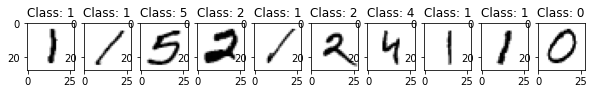

In [ ]:
'''4. 데이터 확인하기 (2) '''
pltsize = 1                                                             
plt.figure(figsize=(10*pltsize,pltsize))
for i in range(10):
  plt.subplot(1,10, i +1)
  plt.axis('on')
  plt.imshow(x_train[i,:,:,:].numpy().reshape(28,28), cmap ="gray_r")
  plt.title('Class: ' + str(y_train[i].item()))

In [ ]:
''' 5. MLP(Multi Layer Perceptron) 모델 설계하기 '''
class Net(nn.Module):                 # nn.module클래스를 상속받는 NET클래스, nn.module클래스를 상속받았을 때, nn.module클래스가 이용할 수 있는 함수를 그대로 이용 가능
  def __init__(self):                 # net클래스의 인스턴스를 생성했을 때 지니게 되는 성질을 정의해주는 메서드
    super(Net,self).__init__()        # nn.module 내에 있는 메서드를 상속받아 이용
    self.fc1 = nn.Linear(28*28,512)   # fully connected layer를 정의, 가로 픽셀 수*세로 픽셀 수 * 채널 수 크기의 노드 수를 설정, 두번째 노드 수를 512로 설정할 것이기에 output의 노드 수는 512로 설정
    self.fc2 = nn.Linear(512,256)     # output의 노드 수를 input으로 받아 세번째 노드 수로 사용할 256을 output으로 설정
    self.fc3 = nn.Linear(256,10)      # 0부터 9까지 총 10가지 클래스를 표현하기 위한 label 값은 원핫인코딩으로 표현, (원핫인코딩 : 해당하는 값에 대해서 맞으면 1, 아니면 0을 부여. 즉 고유값에 해당되는 특징에는 1, 나머지는 0)
  def forward(self, x):               # net클래스를 이용해 설계한 MLP 모델의 forward propagation을 정의, 즉 input -> output의 과정을 나열
    x = x.view(-1,28*28)              # MLP모델은 1차원의 벡터 값을 입력으로 받는다. 이미지는 2차원이기에 1차원으로 바꾸기 위한 View메서드를 이용해 784크기의 1차원 데이터로 변환해 진행, 이 과정을 flatten한다고 한다.
    x = self.fc1(x)                   
    x = F.sigmoid(x)                  # pytorch 중 인공 신경망 설계에 유용한 함수를 모아 놓은 torch.nn.functional 내에 정의된 비선형 함수인 sigmoid()를 이용해 두번째 층의 input으로 계산
    x = self.fc2(x)
    x = F.sigmoid(x)
    x = self.fc3(x)
    x = F.log_softmax(x, dim = 1)     # log.softmax()를 이용해 최종 output을 계산 
                                      # 0~9까지 총 10가지 경우의 수 중 하나로 분류하는 일을 수행하기 때문에 softmax를 이용해 확률 값을 계산, 이때 loss에 대한 gradient 값을 원활하게 계산하기 위해 log_softmax를 사용
    return x

''' 6. optimizer, objective function 설정하기 '''
model = Net().to(DEVICE)                                                    # 5에서 정의한 MLP모델을 기존에 선정한 DEVICE에 할당한다. DEVICE장비를 이용해 MLP모델을 완성하기 위해서
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)  # Back Propagation을 이용해 파라미터를 업데이트할 때 이용하는 optimizer을 정의
                                                                            # SGD알고리즘을 사용해 업데이트하는데, learning rate를 0.01, optimizer의 관성을 나타내는 momentum을 0.5
criterion = nn.CrossEntropyLoss()                                           # MLP 모델의 output 값과 계산할 label 값은 class를 표현하는 원핫 인코딩 값이다. 이 두개의 Loss를 계산하기 위한 함수

print(model)

''' 7. MLP 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의 '''
def train(model, train_loader, optimizer, log_interval):                    # 이미지 데이터와 레이블 데이터를 이용해 MLP모델을 학습하는 train함수를 정의
  model.train()                                                             # 기존에 정의한 MLP모델을 학습 상태로 지정
  for batch_idx,(image, label) in enumerate(train_loader):                  # 기존의 train_loader에 이미지와 레이블 데이터가 mini-batch단위로 묶여있다. 저장된 데이터를 순서대로 이용해 MLP를 학습
    image = image.to(DEVICE)
    label = label.to(DEVICE)
    optimizer.zero_grad()                                                   # 기존에 정의한 장비에 이미지 데이터와 레이블을 할당할 경우 
                                                                            # 과거에 이용한 mini-batch 내에 있는 이미지 데이터와 레이블 데이터를 바탕으로 계산된 loss의 gradient값이 optimizer에 할당돼 있으므로 optimizer의 gradient 초기화
    output = model(image)                                                   # 장비에 할당된 이미지 데이터를 MKP모델의 input으로 이용해 output을 계산
    loss = criterion(output,label)                                          # 계산된 ouptut과 장비에 할당된 레이블 데이터를 기존에 정의한 crossentropy를 이용해 loss를 계산
    loss.backward()                                                         # 계산한 loss를 바탕으로 back propagation을 통해 계산된 gradient 값을 할당
    optimizer.step()                                                        # 각 파라미터에 할당된 gradient 값을 이용해 파라미터 값을 업데이트한다.
    
    if batch_idx % log_interval == 0:
      print("train epoch: {} [{}/{}({:.0f}%]\tTrain Loss: {:.6f}".format(Epoch,batch_idx * len(image),len(train_loader.dataset),100.*batch_idx / len(train_loader),loss.item()))


''' 8. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의 '''
def evaluate(model, test_loader):                                           # MLP모델 학습 과정 또는 학습이 완료된 상태에서 MLP모델의 성능을 평가 함수
  model.eval()                                                              # 학습 과정 또는 학습이 완료된 MLP모델을 평가상태로 지정한다.
  test_loss = 0                                                             # test_loader내의 데이터를 이용해 loss값을 계산하기 위해 test_loss를 0으로 지정
  correct = 0                                                               # 학습 과정 또는 학습이 완료된 MLP 모델이 올바른 Class로 분류한 경우를 세기 위해 0으로 임시 설정

  with torch.no_grad():                                                     # gradient를 통해 파라미터 값이 업데이트되는 현상을 방지하기 위해 gradient의 흐름을 억제
    for image, label in test_loader:                                        
      image = image.to(DEVICE)                                              
      label = label.to(DEVICE)
      output = model(image)                                                 # 장비에 할당한 이미지 데이터를 MLP 모델의 input으로 output을 계산
      test_loss += criterion(output, label).item()                          # 계산된 output과 장비에 할당된 레이블 데이터를 기존에 정의한 crossentropy를 이용해 loss값을 계산한 결과값을 test_loss에 더해 업데이트
      prediction = output.max(1, keepdim = True)[1]                         # MLP 모델의 Output 값은 크기가 10인 벡터 값이기에 계산된 벡터 값 내 가장 큰 값인 위치에 대해 해당 위치에 대응하는 클래스로 예측했다 판단
      correct += prediction.eq(label.view_as(prediction)).sum().item()      # MLP모델이 예측한 클래스 값과 실제 레이블이 의미하는 클래스가 맞으면 correct에 더해 올바르게 예측한 횟수를 저장

  test_loss /= len(test_loader.dataset)                                     # 계산된 test_loss의 값을 test_loader 내에 존재하는 mini-batch 개수만큼 나누어 평균 loss값을 계산
  test_accuracy = 100*correct/len(test_loader.dataset)                      # test_loader 데이터 중 얼마나 맞췄는지를 계산해 정확도를 계산
  return test_loss, test_accuracy

''' 9. MLP 학습을 실행하면서 Train, Test set의 Loss 및 Test set Accuracy를 확인하기 '''
for Epoch in range(1, EPOCHS + 1):                                          
  train(model, train_loader, optimizer, log_interval = 200)                 # model은 기존에 정의한 MLP모델, train_loader는 학습 데이터, optimizer는 SGD, log_interval은 학습이 진행되면서 mini-batch의 index를 이용
  test_loss, test_accuracy = evaluate(model, test_loader) 
  print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".format(Epoch, test_loss, test_accuracy))


Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)
train epoch: 1 [0/60000(0%]	Train Loss: 2.831132


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


train epoch: 1 [6400/60000(11%]	Train Loss: 2.257404
train epoch: 1 [12800/60000(21%]	Train Loss: 2.076853
train epoch: 1 [19200/60000(32%]	Train Loss: 1.890658
train epoch: 1 [25600/60000(43%]	Train Loss: 1.747658
train epoch: 1 [32000/60000(53%]	Train Loss: 1.576324
train epoch: 1 [38400/60000(64%]	Train Loss: 1.349623
train epoch: 1 [44800/60000(75%]	Train Loss: 1.229416
train epoch: 1 [51200/60000(85%]	Train Loss: 1.097955
train epoch: 1 [57600/60000(96%]	Train Loss: 0.949970

[EPOCH: 1], 	Test Loss: 0.0259, 	Test Accuracy: 82.74 %

train epoch: 2 [0/60000(0%]	Train Loss: 0.900191
train epoch: 2 [6400/60000(11%]	Train Loss: 0.687948
train epoch: 2 [12800/60000(21%]	Train Loss: 0.798250
train epoch: 2 [19200/60000(32%]	Train Loss: 0.770674
train epoch: 2 [25600/60000(43%]	Train Loss: 0.554485
train epoch: 2 [32000/60000(53%]	Train Loss: 0.827075
train epoch: 2 [38400/60000(64%]	Train Loss: 0.489850


KeyboardInterrupt: ignored

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F 
from torchvision import transforms, datasets
from torchvision.datasets import MNIST
import tensorflow_datasets
import torchvision.transforms as transforms

'''1. 딥러닝 모델을 설계할 때 활용하는 장비 확인 '''
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')

print(torch.__version__,DEVICE)

BATCH_SIZE = 32 # MLP모델을 학습할 때 필요한 데이터 개수의 단위, 즉 MINI-BATCH 1개 단위에 대해 데이터가 32개로 구성
EPOCHS = 10 # 1개의 MINI-BATCH를 이용해 학습하는 횟수를 Iteration, 전체 데이터를 이용해 학습을 진행한 횟수를 epoch라 한다.

'''2. MNIST 데이터 다운로드(Train set, Test set 분리하기) '''
train_dataset = datasets.FashionMNIST(root = "../data/FashionMNIST",                  # 데이터가 저장될 장소를 지정, 여기서'../'는 상위폴더
                               train = True,                            # 대상 데이터가 MLP모델을 학습하기 위해 이용하는 학습용 데이터인지 학습된이후 성능을 검증하기 위한 검증용 데이터인지를 지정한다. true가 학습용 false는 검증용 데이터
                               transform  = transforms.ToTensor(),      # 이미지 데이터로 다운받아지기 때문에, tensor형태로 변경한다. 0~255 범위의 스칼라 값인 픽셀을 안정화를 위해 0~1 범위에서 정규화 과정을 진행한다.
                               download = True)                         # 해당 데이터를 인터넷상에서 다운로드해 이용할 것인지를 지정한다.

test_dataset = datasets.FashionMNIST(root = "../data/FashionMNIST",
                              train = False,
                              transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,     # mini-batch 단위로 할당하고자 하는 데이터셋을 지정, dataloader함수를 이용해 mini-batch를 구성, 할당하고자 하는 데이터셋을 지정
                                           batch_size = BATCH_SIZE,     # mini-batch 1개 단위를 구성하는 데이터의 개수를 지정
                                           shuffle = True)              # 컴퓨터가 순서를 암기하지 못하도록 데이터의 순서를 섞는다.

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

'''3. 데이터 확인하기 (1) '''
for (x_train,y_train) in train_loader:
  print('x_train:', x_train.size(), 'type:', x_train.type()) # 32개의 이미지 데이터가 1개의 mini-batch를 구성, 가로 28개, 세로 28개의 픽셀로 구성, 채널이 1이므로 gray scale로 이루어진, 즉 흑백으로 이루어진 이미지 데이터
  print('y_train:', y_train.size(), 'type:', y_train.type()) # 32개의 이미지 데이터 각각에 label 값이 1개씩 존재하기 때문에 32개의 값을 가지고 있다. 

'''4. 데이터 확인하기 (2) '''
pltsize = 1                                                             
plt.figure(figsize=(10*pltsize,pltsize))
for i in range(10):
  plt.subplot(1,10, i +1)
  plt.axis('on')
  plt.imshow(x_train[i,:,:,:].numpy().reshape(28,28), cmap ="gray_r")
  plt.title('Class: ' + str(y_train[i].item()))

''' 5. MLP(Multi Layer Perceptron) 모델 설계하기 '''
class Net(nn.Module):                 # nn.module클래스를 상속받는 NET클래스, nn.module클래스를 상속받았을 때, nn.module클래스가 이용할 수 있는 함수를 그대로 이용 가능
  def __init__(self):                 # net클래스의 인스턴스를 생성했을 때 지니게 되는 성질을 정의해주는 메서드
    super(Net,self).__init__()        # nn.module 내에 있는 메서드를 상속받아 이용
    self.fc1 = nn.Linear(28*28,512)   # fully connected layer를 정의, 가로 픽셀 수*세로 픽셀 수 * 채널 수 크기의 노드 수를 설정, 두번째 노드 수를 512로 설정할 것이기에 output의 노드 수는 512로 설정
    self.fc2 = nn.Linear(512,256)     # output의 노드 수를 input으로 받아 세번째 노드 수로 사용할 256을 output으로 설정
    self.fc3 = nn.Linear(256,10)      # 0부터 9까지 총 10가지 클래스를 표현하기 위한 label 값은 원핫인코딩으로 표현, (원핫인코딩 : 해당하는 값에 대해서 맞으면 1, 아니면 0을 부여. 즉 고유값에 해당되는 특징에는 1, 나머지는 0)
  def forward(self, x):               # net클래스를 이용해 설계한 MLP 모델의 forward propagation을 정의, 즉 input -> output의 과정을 나열
    x = x.view(-1,28*28)              # MLP모델은 1차원의 벡터 값을 입력으로 받는다. 이미지는 2차원이기에 1차원으로 바꾸기 위한 View메서드를 이용해 784크기의 1차원 데이터로 변환해 진행, 이 과정을 flatten한다고 한다.
    x = self.fc1(x)                   
    x = F.sigmoid(x)                  # pytorch 중 인공 신경망 설계에 유용한 함수를 모아 놓은 torch.nn.functional 내에 정의된 비선형 함수인 sigmoid()를 이용해 두번째 층의 input으로 계산
    x = self.fc2(x)
    x = F.sigmoid(x)
    x = self.fc3(x)
    x = F.log_softmax(x, dim = 1)     # log.softmax()를 이용해 최종 output을 계산 
                                      # 0~9까지 총 10가지 경우의 수 중 하나로 분류하는 일을 수행하기 때문에 softmax를 이용해 확률 값을 계산, 이때 loss에 대한 gradient 값을 원활하게 계산하기 위해 log_softmax를 사용
    return x

''' 6. optimizer, objective function 설정하기 '''
model = Net().to(DEVICE)                                                    # 5에서 정의한 MLP모델을 기존에 선정한 DEVICE에 할당한다. DEVICE장비를 이용해 MLP모델을 완성하기 위해서
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)  # Back Propagation을 이용해 파라미터를 업데이트할 때 이용하는 optimizer을 정의
                                                                            # SGD알고리즘을 사용해 업데이트하는데, learning rate를 0.01, optimizer의 관성을 나타내는 momentum을 0.5
criterion = nn.CrossEntropyLoss()                                           # MLP 모델의 output 값과 계산할 label 값은 class를 표현하는 원핫 인코딩 값이다. 이 두개의 Loss를 계산하기 위한 함수

print(model)

''' 7. MLP 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의 '''
def train(model, train_loader, optimizer, log_interval):                    # 이미지 데이터와 레이블 데이터를 이용해 MLP모델을 학습하는 train함수를 정의
  model.train()                                                             # 기존에 정의한 MLP모델을 학습 상태로 지정
  for batch_idx,(image, label) in enumerate(train_loader):                  # 기존의 train_loader에 이미지와 레이블 데이터가 mini-batch단위로 묶여있다. 저장된 데이터를 순서대로 이용해 MLP를 학습
    image = image.to(DEVICE)
    label = label.to(DEVICE)
    optimizer.zero_grad()                                                   # 기존에 정의한 장비에 이미지 데이터와 레이블을 할당할 경우 
                                                                            # 과거에 이용한 mini-batch 내에 있는 이미지 데이터와 레이블 데이터를 바탕으로 계산된 loss의 gradient값이 optimizer에 할당돼 있으므로 optimizer의 gradient 초기화
    output = model(image)                                                   # 장비에 할당된 이미지 데이터를 MKP모델의 input으로 이용해 output을 계산
    loss = criterion(output,label)                                          # 계산된 ouptut과 장비에 할당된 레이블 데이터를 기존에 정의한 crossentropy를 이용해 loss를 계산
    loss.backward()                                                         # 계산한 loss를 바탕으로 back propagation을 통해 계산된 gradient 값을 할당
    optimizer.step()                                                        # 각 파라미터에 할당된 gradient 값을 이용해 파라미터 값을 업데이트한다.
    
    if batch_idx % log_interval == 0:
      print("train epoch: {} [{}/{}({:.0f}%]\tTrain Loss: {:.6f}".format(Epoch,batch_idx * len(image),len(train_loader.dataset),100.*batch_idx / len(train_loader),loss.item()))


''' 8. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의 '''
def evaluate(model, test_loader):                                           # MLP모델 학습 과정 또는 학습이 완료된 상태에서 MLP모델의 성능을 평가 함수
  model.eval()                                                              # 학습 과정 또는 학습이 완료된 MLP모델을 평가상태로 지정한다.
  test_loss = 0                                                             # test_loader내의 데이터를 이용해 loss값을 계산하기 위해 test_loss를 0으로 지정
  correct = 0                                                               # 학습 과정 또는 학습이 완료된 MLP 모델이 올바른 Class로 분류한 경우를 세기 위해 0으로 임시 설정

  with torch.no_grad():                                                     # gradient를 통해 파라미터 값이 업데이트되는 현상을 방지하기 위해 gradient의 흐름을 억제
    for image, label in test_loader:                                        
      image = image.to(DEVICE)                                              
      label = label.to(DEVICE)
      output = model(image)                                                 # 장비에 할당한 이미지 데이터를 MLP 모델의 input으로 output을 계산
      test_loss += criterion(output, label).item()                          # 계산된 output과 장비에 할당된 레이블 데이터를 기존에 정의한 crossentropy를 이용해 loss값을 계산한 결과값을 test_loss에 더해 업데이트
      prediction = output.max(1, keepdim = True)[1]                         # MLP 모델의 Output 값은 크기가 10인 벡터 값이기에 계산된 벡터 값 내 가장 큰 값인 위치에 대해 해당 위치에 대응하는 클래스로 예측했다 판단
      correct += prediction.eq(label.view_as(prediction)).sum().item()      # MLP모델이 예측한 클래스 값과 실제 레이블이 의미하는 클래스가 맞으면 correct에 더해 올바르게 예측한 횟수를 저장

  test_loss /= len(test_loader.dataset)                                     # 계산된 test_loss의 값을 test_loader 내에 존재하는 mini-batch 개수만큼 나누어 평균 loss값을 계산
  test_accuracy = 100*correct/len(test_loader.dataset)                      # test_loader 데이터 중 얼마나 맞췄는지를 계산해 정확도를 계산
  return test_loss, test_accuracy

''' 9. MLP 학습을 실행하면서 Train, Test set의 Loss 및 Test set Accuracy를 확인하기 '''
for Epoch in range(1, EPOCHS + 1):                                          
  train(model, train_loader, optimizer, log_interval = 200)                 # model은 기존에 정의한 MLP모델, train_loader는 학습 데이터, optimizer는 SGD, log_interval은 학습이 진행되면서 mini-batch의 index를 이용
  test_loss, test_accuracy = evaluate(model, test_loader) 
  print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".format(Epoch, test_loss, test_accuracy))


# *PART3* deep learning

## 1. 딥러닝의 정의
신경망은 학습하는 알고리즘의 특성상 과적합이 심하게 일어나며 Gradient Vanishing이 일어난다. 그래서 학습 과정 내에서 과적합을 어느 정도 방지할 수 있는 SVM과 Ensemble Learning이 많이 사용되었다. 딥러닝은 2개 이상의 Hidden Layer를 를 지나고 있는 다층 신경망(deep neural network,DNN)라 할 수 있다. 신경망을 기반으로 한 모델이기 때문이다. 

## 2. 딥러닝 종류
- AI Background 부분 - MLP
- 이지미 관련 분야 - CNN
- 텍스트와 같은 시계열 분야 - RNN
딥러닝은 CNN과 RNN 구조를 바탕으로 다양하게 파생

## 3. 딥러닝의 발전을 이끈 알고리즘

### 3.1 Dropout
신경망의 학습 과정 중 layer의 노드를 랜덤하게 drop함으로서 generalization 효과를 가져오게 하는 테크닉입니다. 

dropout을 적용한다는 것은 weight matrix에 랜덤하게 일부 column에 0을 집어넣어 연산을 한다는 것. dropout을 적용할 때는 얼마나 랜덤하게 dropout한 것인지에 대한 확률 값을 지정해야 하고, 이는 input layer과 hidden layer에도 적용할 수 있다. epoch마다 랜덤하게 dropout할 수도 있다. dropout은 유전 알고리즘에서 아이디어를 차용한 것이다. 

Ensemble Learning의 기본 콘셉트는 다양한 모델이다. 다양한 모델을 만들기 위해 데이터를 랜덤하게 구성하고 변수도 랜덤하게 구성한 것이 RandomForest이다. 신경망의 한 epoch을 하나의 모델로 보고 dropout을 랜덤한 변수의 구성으로 본다면 dropout을 적용한 신경망은 일종의 randomforest와 비슷한 모델 구성이라 할 수 있다.

MNIST 손글씨 데이터를 활용하여 dropout을 적용시켜본다.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F 
from torchvision import transforms, datasets
from torchvision.datasets import MNIST
import tensorflow_datasets
import torchvision.transforms as transforms

''' 5. Multi Layer Perception(MLP) 모델 설계하기 - dropout 적용 전
class Net(nn.Module):                 # nn.module클래스를 상속받는 NET클래스, nn.module클래스를 상속받았을 때, nn.module클래스가 이용할 수 있는 함수를 그대로 이용 가능
  def __init__(self):                 # net클래스의 인스턴스를 생성했을 때 지니게 되는 성질을 정의해주는 메서드
    super(Net,self).__init__()        # nn.module 내에 있는 메서드를 상속받아 이용
    self.fc1 = nn.Linear(28*28,512)   # fully connected layer를 정의, 가로 픽셀 수*세로 픽셀 수 * 채널 수 크기의 노드 수를 설정, 두번째 노드 수를 512로 설정할 것이기에 output의 노드 수는 512로 설정
    self.fc2 = nn.Linear(512,256)     # output의 노드 수를 input으로 받아 세번째 노드 수로 사용할 256을 output으로 설정
    self.fc3 = nn.Linear(256,10)      # 0부터 9까지 총 10가지 클래스를 표현하기 위한 label 값은 원핫인코딩으로 표현, (원핫인코딩 : 해당하는 값에 대해서 맞으면 1, 아니면 0을 부여. 즉 고유값에 해당되는 특징에는 1, 나머지는 0)
  def forward(self, x):               # net클래스를 이용해 설계한 MLP 모델의 forward propagation을 정의, 즉 input -> output의 과정을 나열
    x = x.view(-1,28*28)              # MLP모델은 1차원의 벡터 값을 입력으로 받는다. 이미지는 2차원이기에 1차원으로 바꾸기 위한 View메서드를 이용해 784크기의 1차원 데이터로 변환해 진행, 이 과정을 flatten한다고 한다.
    x = self.fc1(x)                   
    x = F.sigmoid(x)                  # pytorch 중 인공 신경망 설계에 유용한 함수를 모아 놓은 torch.nn.functional 내에 정의된 비선형 함수인 sigmoid()를 이용해 두번째 층의 input으로 계산
    x = self.fc2(x)
    x = F.sigmoid(x)
    x = self.fc3(x)
    x = F.log_softmax(x, dim = 1)     # log.softmax()를 이용해 최종 output을 계산 
                                      # 0~9까지 총 10가지 경우의 수 중 하나로 분류하는 일을 수행하기 때문에 softmax를 이용해 확률 값을 계산, 이때 loss에 대한 gradient 값을 원활하게 계산하기 위해 log_softmax를 사용
    return x                                                      '''

# 5. Multi Layer Perception(MLP) 모델 설계하기 - dropout 적용 후
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28*28,512)
    self.fc2 = nn.Linear(512,256)
    self.fc3 = nn.Linear(256,10)
    self.dropout_prob = 0.5           # 몇 퍼센트의 노드에 대해 가중값을 계산하지 않을 것인지 명시, 50%의 노드에 대해 가중값을 계산하지 않기 위해 0.5로 정의

  def forward(self,x):
    x = x.view(-1, 28*28)
    x = self.fc1(x)
    x = F.sigmoid(x)
    x = F.dropout(x, training = self.training, p = self.dropout_prob) # 각 sigmoid함수의 결괏값에 대해 dropout을 적용하는 부분, x값에 적용하여 p 값은 몇 퍼센트의 노드에 대해 계산하지 않을 것인지 
                                                                      # 조정하는 요소, training = self.training 은 학습 상태일 때와 검증 상태에 따라 다르게 적용되기 위해 존재하는 파라미터
    x = self.fc2(x)
    x = F.sigmoid(x)
    x = F.dropout(x, training = self.training, p = self.dropout_prob) # dropout은 학습 과정 속에서 랜덤으로 노드를 선택해 가중값이 업데이트되지 않도록 하지만 평가 과정 속에서는 모든 노드를 
                                                                      # 이용해 output을 계산하기 때문에 학습 상태와 검증 상태에서 다르게 적용돼야 한다.
    x = self.fc3(x)
    x = F.log_softmax(x, dim = 1)
    return x

### 3.2 Activation 함수
activation 함수는 어떤 신호를 입력받아 이를 적절히 처리해 출력해주는 함수

MLP에서 기본적으로 시그모이드 함수를 사용한다. 이때 시그모이드 함수를 activation 함수라 한다.

#### 3.2.1 ReLU함수
ReLU(rectified linear unit) 함수는 시그모이드 함수와 같은 비선형 활성 함수가 지니고 있는 문제점을 어느 정도 해결한 활성 함수이다. ReLU는 f(x)=max(0,x)와 같이 정의

입력 값이 0 이상이면 이 값 그대로 출력, 0 이하이면 0으로 출력

dropout은 보통 ReLU() 비선형 함수와 잘 어울린다.

이 활성 함수를 미분할 때 입력 값이 0 이상인 부분은 기울기가 1, 입력 값이 0 이하인 부분은 0이 된다. 즉, Back Propagation 과정 중 곱해지는 Activation 미분값이 0 또는 1이 되기 때문에 아예 없애거나 완전히 살리는 것으로 해석할 수 있다. 이를 통해 Hidden Layer이 깊어져도 Gradient Vanishing이 일어나는 것을 완화시키며 layer를 깊게 쌓아 복잡한 모형을 만들 수 있게 된 것

ReLU의 변형으로 Leaky ReLU, ELU, parametric ReLU, SELU, SERLU 등 다양한 Activation 함수가 있고, CIFAR10 데이터에 각 활성 함수를 적용한 성능 그래프는 SERLU의 성능이 가장 좋다는 것을 볼 수 있다, 

기존에 Fully Connected Layer에서 sigmoid 대신 ReLU 비선형 함수를 사용해본다.



In [ ]:
''' 5. Multi Layer Perception(MLP) 모델 설계하기 '''
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28*28,512)
    self.fc2 = nn.Linear(512,256)
    self.fc3 = nn.Linear(256,10)
    self.dropout_prob = 0.5           # 몇 퍼센트의 노드에 대해 가중값을 계산하지 않을 것인지 명시, 50%의 노드에 대해 가중값을 계산하지 않기 위해 0.5로 정의

  def forward(self,x):
    x = x.view(-1, 28*28)
    x = self.fc1(x)
    x = F.relu(x)
    x = F.dropout(x, training = self.training, p = self.dropout_prob) # 각 sigmoid함수의 결괏값에 대해 dropout을 적용하는 부분, x값에 적용하여 p 값은 몇 퍼센트의 노드에 대해 계산하지 않을 것인지 
                                                                      # 조정하는 요소, training = self.training 은 학습 상태일 때와 검증 상태에 따라 다르게 적용되기 위해 존재하는 파라미터
    x = self.fc2(x)
    x = F.relu(x)
    x = F.dropout(x, training = self.training, p = self.dropout_prob) # dropout은 학습 과정 속에서 랜덤으로 노드를 선택해 가중값이 업데이트되지 않도록 하지만 평가 과정 속에서는 모든 노드를 
                                                                      # 이용해 output을 계산하기 때문에 학습 상태와 검증 상태에서 다르게 적용돼야 한다.
    x = self.fc3(x)
    x = F.log_softmax(x, dim = 1)
    return x

### 3.3 batch normalization
신경망에서 Internal Coveriance shift라는 현상도 발생한다. 각 layer마다 input분포가 달라짐에 따라 학습 속도가 느려지는 현상을 말한다. batch normalization은 이를 방지하기 위한 기법으로 layer의 input분포를 정규화해 학습 속도를 빠르게 하겠다는 것

기본적인 정규화하는 수식과 거의 일치한다. 

ReLU 함수를 통해 데이터의 0의 미만 값이 0으로 된다. 이후 다음 Weight와 선형 결합을 통해 분포가 우측으로 이동되고, batch normalization을 통해 정규 분포와 비슷한 형태로 정규화된다. batch normalization을 하지 않고 바로 ReLU 함수에 들어간다면 그래프가 우측 편향된 상태로 hidden layer을 하는 의미가 사라질 수 있다. batch normalization의 분포를 정규화해 y축을 기준으로 정규화시켜 대칭으로 만들어 비선형 활성 함수의 의미를 살린다.

nn.BatchNorm 함수를 activation function 이전에 적용하는지 이후에 적용하는지는 다 다르다. 전에 적용해서 더 좋을 수도 있고, 이후에 적용해서 더 좋을 수도 있다.

In [ ]:
''' 5. Multi Layer Perception(MLP) 모델 설계하기 '''
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28*28,512)
    self.fc2 = nn.Linear(512,256)
    self.fc3 = nn.Linear(256,10)
    self.dropout_prob = 0.5                 # 몇 퍼센트의 노드에 대해 가중값을 계산하지 않을 것인지 명시, 50%의 노드에 대해 가중값을 계산하지 않기 위해 0.5로 정의
    self.batch_norm1 = nn.BatchNormld(512)  # nn.BatchNorm 을 class 내에서 이용, 이때 첫번째 fully connect layer의 output이 512 크기의 벡터 값이 기때문에 512로 설정
    self.batch_norm2 = nn.BatctNormld(256)

  def forward(self,x):
    x = x.view(-1, 28*28)
    x = self.fc1(x)
    x = self.batch_norm1(x)                 # 첫번째 fully connected layer의 output을 위에서 정의한 self.batch_norm1 의 input으로 이용
    x = F.relu(x)
    x = F.dropout(x, training = self.training, p = self.dropout_prob) # 각 sigmoid함수의 결괏값에 대해 dropout을 적용하는 부분, x값에 적용하여 p 값은 몇 퍼센트의 노드에 대해 계산하지 않을 것인지 
                                                                      # 조정하는 요소, training = self.training 은 학습 상태일 때와 검증 상태에 따라 다르게 적용되기 위해 존재하는 파라미터
    x = self.fc2(x)
    x = self.batch_norm2(x)
    x = F.relu(x)
    x = F.dropout(x, training = self.training, p = self.dropout_prob) # dropout은 학습 과정 속에서 랜덤으로 노드를 선택해 가중값이 업데이트되지 않도록 하지만 평가 과정 속에서는 모든 노드를 
                                                                      # 이용해 output을 계산하기 때문에 학습 상태와 검증 상태에서 다르게 적용돼야 한다.
    x = self.fc3(x)
    x = F.log_softmax(x, dim = 1)
    return x

### 3.4 initialization
초기 분포로 uniform distribution이나 normal distribution을 사용했다. weight를 램덤하게 초기화하면 신경망의 초기 loss가 달라진다. 즉 신경망을 초기화할 때마다 신경망의 loss상에서의 위치가 달라질 수 있다. 즉, 신경망을 어떻게 초기화하느냐에 따라 학습 속도가 달라질 수 있다. 그래서 기법이 다양하게 연구되고 있다.
- LeCun Initialization

LeCun Uniform Initialization 과 LeCun Normal Initialization이 있다. 각각 초기 분포가 다음과 같은 분포를 따르도록 weight를 초기화하는 것

- He Initialization

ReLU함수를 사용할 때 비효율 적이라는 것을 보완한 초기화 기법이다

일반적인 딥러닝 모델은 다음 순서대로 설계해 학습하고 성능을 평가한다.
1. 모델 구조를 설계하고 설계된 모델 구조의 파라미터 값을 랜덤으로 샘플링
2. Feature 값으로 이용되는 데이터를 설계한 모델의 input으로 사용해 output을 계산
3. 계산된 output을 input으로 이용한 feature 값과 매칭되는 레이블 값을 기존에 정의한 objective function을 통해 loss 값으로 계산
4. 계산된 loss 값을 통해 gradient를 계산해 모델 내 파라미터 값을 back propagation에 의해 업데이트
5. 이를 반복해 학습을 진행하며 학습이 완료된 이후 완성된 모델의 성능을 평가

이때 1에서 모델 구조의 파라미터 값을 랜덤으로 샘플링하는 과정에서 어떤 분포에서 샘플링을 진행하는지에 따라 좋은 방향으로 학습이 진행될 수도 있기 때문에 중요하다. 현재 이용하고 있는 nn.linear는 output으로 계산되는 벡터의 차원 수의 역수 값에 대한 +/- 범위 내 uniform distribution을 설정해 샘플링한다.

이를 he initialization을 이용해 파라미터를 초기화하자.


In [ ]:
''' 6. optimizer, objective function 설정하기 '''
import torch.nn.init as init
def weight_init(m):
  if isinstance(m, nn.Linear):
    init.kaiming_uniform_(m.weight.data)

model = Net().to(DEVICE)                                                    # 5에서 정의한 MLP모델을 기존에 선정한 DEVICE에 할당한다. DEVICE장비를 이용해 MLP모델을 완성하기 위해서
model.apply(weight_init)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)  # Back Propagation을 이용해 파라미터를 업데이트할 때 이용하는 optimizer을 정의
                                                                            # SGD알고리즘을 사용해 업데이트하는데, learning rate를 0.01, optimizer의 관성을 나타내는 momentum을 0.5
criterion = nn.CrossEntropyLoss()                                           # MLP 모델의 output 값과 계산할 label 값은 class를 표현하는 원핫 인코딩 값이다. 이 두개의 Loss를 계산하기 위한 함수

print(model)

In [ ]:
''' 5. Multi Layer Perception(MLP) 모델 설계하기 '''
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28*28,512)
    self.fc2 = nn.Linear(512,256)
    self.fc3 = nn.Linear(256,10)
    self.dropout_prob = 0.5                 # 몇 퍼센트의 노드에 대해 가중값을 계산하지 않을 것인지 명시, 50%의 노드에 대해 가중값을 계산하지 않기 위해 0.5로 정의
    self.batch_norm1 = nn.BatchNorm1d(512)  # nn.BatchNorm 을 class 내에서 이용, 이때 첫번째 fully connect layer의 output이 512 크기의 벡터 값이 기때문에 512로 설정
    self.batch_norm2 = nn.BatchNorm1d(256)

  def forward(self,x):
    x = x.view(-1, 28*28)
    x = self.fc1(x)
    x = self.batch_norm1(x)                 # 첫번째 fully connected layer의 output을 위에서 정의한 self.batch_norm1 의 input으로 이용
    x = F.relu(x)
    x = F.dropout(x, training = self.training, p = self.dropout_prob) # 각 sigmoid함수의 결괏값에 대해 dropout을 적용하는 부분, x값에 적용하여 p 값은 몇 퍼센트의 노드에 대해 계산하지 않을 것인지 
                                                                      # 조정하는 요소, training = self.training 은 학습 상태일 때와 검증 상태에 따라 다르게 적용되기 위해 존재하는 파라미터
    x = self.fc2(x)
    x = self.batch_norm2(x)
    x = F.relu(x)
    x = F.dropout(x, training = self.training, p = self.dropout_prob) # dropout은 학습 과정 속에서 랜덤으로 노드를 선택해 가중값이 업데이트되지 않도록 하지만 평가 과정 속에서는 모든 노드를 
                                                                      # 이용해 output을 계산하기 때문에 학습 상태와 검증 상태에서 다르게 적용돼야 한다.
    x = self.fc3(x)
    x = F.log_softmax(x, dim = 1)
    return x

''' 6. optimizer, objective function 설정하기 '''
import torch.nn.init as init                                                # weight, bias 등 딥러닝 모델에서 초깃값으로 설정되는 요소에 대한 모듈인 init를 임포트
def weight_init(m):                                                         # MLP모델 내의 Weight를 초기화할 부분을 설정하기 위해 weight_init 함수를 정의
  if isinstance(m, nn.Linear):                                              # nn.Linear 에 해당하는 파라미터 값에 대해서만 지정
    init.kaiming_uniform_(m.weight.data)                                    # nn.Linear 에 해당하는 파라미터 값에 대해 he_initialization을 이용해 파라미터 값을 초기화한다.

model = Net().to(DEVICE)                                                    # 5에서 정의한 MLP모델을 기존에 선정한 DEVICE에 할당한다. DEVICE장비를 이용해 MLP모델을 완성하기 위해서
model.apply(weight_init)                                                    # 정의한 weight_init 함수를 net 클래스의 인스턴스인 model에 적용
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)  # Back Propagation을 이용해 파라미터를 업데이트할 때 이용하는 optimizer을 정의
                                                                            # SGD알고리즘을 사용해 업데이트하는데, learning rate를 0.01, optimizer의 관성을 나타내는 momentum을 0.5
criterion = nn.CrossEntropyLoss()                                           # MLP 모델의 output 값과 계산할 label 값은 class를 표현하는 원핫 인코딩 값이다. 이 두개의 Loss를 계산하기 위한 함수

print(model)

                                                                            # 이전에는 class 내 모델을 설계하는 영역에서 설정했다면 이번에는 모델을 정의하는 부분에서 설정을 바꾼다.
                                                                            # 우선 model을 정의하고 apply를 이용해 모델의 파라미터를 초기화한다.
                                                                            # nn.Linear 인스턴스에 대해서 kaiming_uniform, 즉 he initialization을 이용하여 초기화한다.

NameError: ignored

### 3.5 optimizer
앞서 batch단위로 back propagation하는 과정을 SGD(stochastic gradient descent)라 하고 이런 과정을 optimization이라 한다. 이 optimizer에는 SGD 이외에 다양한 것들이 있다. 

momentum은 미분을 통한 gradient 방향으로 가되, 일종의 관성을 추가하는 개념이다

SGD는 조금씩 최적 해(global optinum)을 찾아간다. 전체 데이터에 대해 back propagation을 하는 것이 아니라 batch단위로 back propagation한다. 이때 momentum을 사용하면 최적의 장소로 더 빠르게 수렴한다.

momentum을 약간 변형한 방법
- NAG(Nesterov Accelerated Gradient)
- Adagrad(Adaptive Gradient)
- RMSProp
- Adadelta(Adaptive Delta)
- Adam(Adaptive Moment Estimation): 가장 많이 사용하는 optimizer
- RAdam(Rectified Adam optimizer)

In [ ]:
# optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

### 3.6 AutoEncoder(AE)
회귀과 분류모델은 지도학습

AE는 대표적인 비지도학습 신경망 모델

hidden layer 앞부분을 인코더(encoder), 뒷부분을 디코더(decoder)라고 한다. 즉, input data에 대해 hidden layer로 인코딩한 후 다시 원래 input data로 디코딩하는 개념

AE를 사용하면 Input data를 latent space에 압축시켜 새로운 feature로 사용할 수 있다. 이것으로 dimension을 줄일 수 있다.

AE의 학습 과정은 데이터를 원래의 데이터로 잘 복원하도록 학습시키는 것

### 3.7 Stacked AutoEncoder
AE를 변형한 모델로 말 그대로 AE를 쌓아 올린 모델

과정은
1. input data로 AE1을 학습
2. 1에서 학습된 모형의 Hidden Layer를 input으로 해 AE2를 학습
3. 2과정을 원하는 만큼 반복
4. 1~3에서 학습된 Hidden layer를 쌓아 올림
5. 마지막 layer에 softamx와 같은 classification 기능이 있는 output layer를 추가
6. fine-tuning으로 전체 다층 신경망을 재학습

fine-tuning은 따로 학습시킨 모델을 재학습시키는 개념로, 미리 학습시키는 것을 pre-trained-model 이라고 하고 이 모델을 재학습시키는 것을 fine-tuning이라 한다.

### 3.8 Denoising AutoEncoder(DAE)
robust는 강건한 이라는 뜻으로 학습하지 않은 데이터도 잘 분류하는 강건한 모델이라는 것입니다. DAE는 좀 더 강건한 feature을 만들기 위한 AE이다.

AE와 마찬가지로 Input 데이터를 잘 복원하도록 학습시키는 모델이지만, input에 약간의 noise를 추가해 학습시킨다. 즉, input이 'x + noise', output이 'x'가 된다.

input data에 noise를 주어 학습시킴으로써 어떤 데이터가 input으로 와도 강건한 모델을 만든다는 것

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')
print('Using pytorch version:', torch.__version__, ' Device:', DEVICE)

BATCH_SIZE = 32
EPOCHS = 10

''' 1. FashionMNIST 데이터 다운로드(Train set, Test set 분리하기) '''
train_dataset = datasets.FashionMNIST(root = "../data/FashionMNIST",
                                      train = True,
                                      download = True,
                                      transform = transforms.ToTensor())

test_dataset = datasets.FashionMNIST(root = "../data/FashionMNIST",
                                     train = False,
                                     transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

''' 2. 데이터 확인하기 (1) '''
for(x_train, y_train) in train_loader:
  break

''' 3. 데이터 확인하기 (2) '''
pltsize = 1
plt.figure(figsize=(10*pltsize,pltsize))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.axis('on')
  plt.imshow(x_train[i,:,:,:].numpy().reshape(28,28),cmap="gray_r")
  plt.title('class: ' + str(y_train[i].item()))

''' 4. AutoEncoder(AE) 모델 설계하기 '''
class AE(nn.Module):
  def __init__(self):
    super(AE, self).__init__()

    self.encoder = nn.Sequential(                 # autoencoder은 인코더와 디코더로 이뤄져 있는데, 그 중 인코더를 정의. 앞에는 forward를 사용했지만 nn.sequential을 사용하여 인코더 단위를 한 번에 정의
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Linear(256,32),)                       # Latent Variable Vector의 크기를 32로 설정
    
    self.decoder = nn.Sequential(
        nn.Linear(32,256),
        nn.ReLU(),
        nn.Linear(256,512),
        nn.ReLU(),
        nn.Linear(512,28*28),)
    
  def forward(self, x):                           # 인코더와 디코더에 데이터를 입력했을 때 output을 계산하기까지의 과정을 나열
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded, decoded

''' 5. Optimizer, Objective Function 설정하기 '''
model = AE().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)
criterion = nn.MSELoss()                          # AE 모델의 output 값과 label 값은 이미지 데이터 이므로 output값은 input으로 이용된 이미지 데이터와 복원된 이미지 데이터 값 간의
                                                  # MeanSquaredError를 이용해 계산하기 위해 nn.MSELoss 로 설정
print(model)

''' 6. AE 모델 학습을 진행하여 학습 데이터에 대한 모델 성능을 확인하는 함수 정의 '''
def train(model, train_loader, optimizer, log_interval):
  model.train()
  for batch_idx,(image, _) in enumerate(train_loader):  # 레이블 데이터를 활용해 학습하지 않고 입력 데이터를 타깃으로 학습하기 때문에 레이블 데이터를 이용할 필요가 없다. _를 사용해 생략했다.
    image = image.view(-1,28*28).to(DEVICE)
    target = image.view(-1,28*28).to(DEVICE)
    optimizer.zero_grad()                               # 이미지 데이터를 바탕으러 계산된 loss의 gradient 값이 optimizer에 할당돼 있으므로 optimizer의 gradient를 초기화한다.
    encoded, decoded = model(image)                     
    loss = criterion(decoded, target)
    loss.backward()
    optimizer.step()

    if batch_idx % log_interval == 0:
      print("train epoch: {} [{}/{}({:.0f}%)]\tTrain Loss: {:.6f}".format(Epoch, batch_idx * len(image), len(train_loader.dataset),100. * batch_idx / len(train_loader),loss.item()))

''' 7. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의 '''
def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  real_image = []
  gen_image = []
  with torch.no_grad():                                                   # gradient를 통해 파라미터 값이 업데이트되는 현상을 방지하기 위해 gradient의 흐름을 억제
    for image, _ in test_loader:                                          # mini-batch 단위로 저장되어 있기에 반복문을 이용해 차례대로 접근
      image = image.view(-1, 28*28).to(DEVICE)
      target = image.view(-1,28*28).to(DEVICE)
      encoded, decoded = model(image)

      test_loss += criterion(decoded, image).item()                       
      real_image.append(image.to("cpu"))                                  # 실제 이미지로 할당된 이미지를 real_image 리스트에 추가
      gen_image.append(decoded.to("cpu"))                                 # autoencoder 모델을 통해 생성된 이미지를 gen_image 리스트에 추가

  test_loss /= len(test_loader.dataset)
  return test_loss, real_image, gen_image

''' 8. AutoEncoder 학습을 실행하며 test set의 reconstruction error 확인하기 '''
for Epoch in range(1, EPOCHS+1):                                          
  train(model, train_loader, optimizer, log_interval = 200)               # 정의한 train함수를 실행하는데, model은 기존에 정의한 MLP모델, train_loader는 학습 데이터, optimizer는 SGD,
                                                                          # log_interval 는 학습이 진행되면서 mini-batch의 index를 인해 과정을 모니터링할 수 있도록 출력
  test_loss, real_image, gen_image = evaluate(model, test_loader)         # 각 epoch별 출력되는 loss값과 실제 이미지, 생성된 이미지를 저장한 real_image, gen_image 리스트를 작성
  print("\n[EPOCH: {}], \tTest Loss: {:.4f}".format(Epoch, test_loss))    # 2개의 for 반복문을 통해 실제 이미지와 생성된 이미지를 비교, autoencoder 모델을 이용해 생성된 이미지와 실제 이미지 간
                                                                          # MeanSquaredError 값을 계산해 test_loss 값을 업데이트
  f, a = plt.subplots(2,10, figsize = (10,4))
  for i in range(10):
    img = np.reshape(real_image[0][i],(28,28))
    a[0][i].imshow(img, cmap = "gray_r")
    a[0][i].set_xticks(( ))
    a[0][i].set_yticks(( ))

  for i in range(10):
    img = np.reshape(gen_image[0][i],(28,28))
    a[1][i].imshow(img, cmap = "gray_r")
    a[1][i].set_xticks(( ))
    a[1][i].set_yticks(( ))
  plt.show()

# *PART4* 컴퓨터 비전

## 1. CNN(Convolutional Neural Network)
특정 이미지를 컴퓨터에게 보여주거나 이미지를 분류하는 모델을 만들 때는 이미지를 구성하는 픽셀 값을 input으로 사용

이미지 픽셀을 Flatten해서 사용하면 x11과 x12는 매우 근접하고 연관되어 있지만 머신러닝이라 하면 input 변수가 독릭적이다. 따라서 x11과 x12의 연관성을 반영하지 못한다.

그렇게 지역 정보(region feature)을 학습할 수 있는 신경망 구조가 필요했기에 이러한 신경망 구조를 CNN이라 한다.

- region feature: region feature을 뽑아내는 convolution layer과 feature dimension 을 위한 pooling layer 그리고 최종적인 분류를 위한 Fully Connected Layer(일반적인 MLP구조를 지니는)로 구성돼 있다.

- convolutional layer: receptive field를 정의해 입력 층의 이미지의 feature를 추출하는 역할이다. 이미지가 input으로 들어왔을 때 사각형 모양의 receptive filed가 이미지를 스캔하면서 이미지의 region feature를 추출한다. 빨간 사각형이 이미지 전체를 돌면서 값을 추출한다. input이미지의 dimension 이 20x20 이고 receptive field가 3x3이라면 여기서 feature의 dimension은 18x18이 된다. 여기서 추출한 feature을 feature map이라 한다. 여기서 weight는 신경망 모형을 이용해 학습하면서 바뀌는 값

- stride: convolution layer에서 receptive field가 이미지를 돌면서 feature을 뽑을 때 이동하는 칸 수이다.

- padding: 5x5 image에 3x3 convolution을 적용하면 3x3 이미지로 줄어든다. 이와 같이 convolution을 적용하면 다음 image 또는 feature의 size가 줄어들고 가장자리에 있는 픽셀 값은 안쪽에 있는 픽셀 값보다 적게 convolution이 적용된다. image size를 줄이지 않고 모든 픽셀 값에 convolution을 적용하기 위해 padding을 적용한다. 기본 이미지의 테두리에 0 값을 넣어 크기를 키워 적용 후 image 또는 feature의 크기를 유지한다.

- weight sharing: convolution layer에서 receptive field를 움직여가며 다음 feature map을 추출할 때 추출한 map의 수를 정한다. 이때 map을 추출할 때 매우 많은 파라미터를 학습해야 한다. 많은 파라미터의 수를 줄이기 위해 CNN을 학습할 때 Weight sharing 기법을 이용한다. weight를 공유한다는 개념으로 field를 옮길 때마다 해당 convolution에서는 같은 weight를 사용한다는 것이다. 

- pooling layer: image 또는 feature의 convolution을 거친 후에 pooling layer를 거친다. pooling은 feature size를 반으로 줄여주는 것이다. stride max pooling을 옆으로 이동시키며 그 사각형 안에서 가장 큰 값을 추출한다. pooling layer을 거치지 않으면 많은 파라미터를 학습해야 하기에 학습 시간이 오래 걸린다. 따라서 CNN의 학습 속도를 향상시키기 위해 feature의 dimension을 줄이는 개념이다. 가장 큰 픽셀 값을 max pooling, 평균 픽셀 값을 average pooling이라 한다.

- fully connected layer: fully connected layer는 MLP구조와 동일하다. pooling layer에 나온 feature를 flatten시켜 MLP의 input으로 놓고 학습을 진행한다. convolution의 receptive field 크기와 stride, pooling의 종류, layer를 쌓는 횟수 모두 사용자가 지정해야 하는 하이퍼파라미터이다. 

## 2. CNN과 MLP
CNN과 MLP의 가장 큰 차이점은 이밎지의 feature을 어떻게 추출하느냐이다.
- MLP는 이미지의 픽셀 값을 바로 네트워크의 input으로 사용하는 것이고, CNN은 이미지의 region feature을 convolutino layer와 pooling layer을 이용해 추출하고 그 feature을 MLP의 input으로 사용한다는 것이다. 

CNN이 이미지 처리와 관련된 비전 방면에서 성능이 좋은 이유는 단지 region feature을 추출할 수 있기 때문이다. 

딥러닝이란 새로운 모델이 아닌 graphical feature을 추출하는 것에 초점을 맞춘 모델


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')

BATCH_SIZE = 32                                                           # MLP 모델을 학습할 때 필요한 데이터 개수의 단위
EPOCHS = 10                                                               # 1개의 Mini-Batch를 통해 학습하는 횟수를 iteration, 전체 데이터를 이용해 학습을 진행한 횟수를 epoch

''' CIFAR10 데이터 다운로드(train set, test set 분리하기) '''
train_dataset = datasets.CIFAR10(root = "../data/CIFAR_10",
                                  train = True,
                                  download = True,
                                  transform = transforms.ToTensor()) 

test_dataset = datasets.CIFAR10(root = "../data/CIFAR_10",
                                train = False,
                                transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                            batch_size = BATCH_SIZE,
                                            shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())             # 32개의 이미지 데이터가 1개의 mini-batch를 이루고 있고, 채널이 3이므로 red,green, blue 색상으로 이뤄진 데이터
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

''' 데이터 확인하기 '''
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))
    plt.title('Class: ' + str(y_train[i].item()))

''' multi layer perceptron(MLP) 모델 설계하기 '''
class Net(nn.Module):                                                      # nn.module 클래스를 상속받는 net 클래스를 정의
    def __init__(self):                                                    # net 클래스의 인스턴스를 생성했을 때 갖게 되는 성질을 정의
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256,10)

    def forward(self,x):
      x = x.view(-1,32*32*3)                                               # cifar-10 이미지 데이터는 32*32*3 크기의 2차원 데이터이기 때문에 이를 1차원으로 바꾸기 위함
      x = self.fc1(x)
      x = F.relu(x)
      x = self.fc2(x)
      x = F.relu(x)
      x = self.fc3(x)
      x = F.log_softmax(x, dim = 1)
      return x

''' optimizr, objective function 설정하기 '''
model = Net().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()
print(model)

''' MLP 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의 '''
def train(model, train_loader, optimizer, log_interval):
    model.train()                                                          # 학습 상태로 지정
    for batch_idx, (image, label) in enumerate(train_loader):              
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()                                              # loss의 gradient값이 optimizer에 할당돼 있으므로 gradient를 초기화한다.
        output = model(image)                                              # MLP모델의 input으로 이용해 output을 계산
        loss = criterion(output, label)
        loss.backward()                                                    # loss값을 계산한 결과를 바탕으로 back grapagation을 통해 계산된 gradient 값을 각 파라미터에 할당
        optimizer.step()                                                   # 파라미터들을 업데이트

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item()))
            
''' 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의 '''
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy


''' MLP 학습 실행하며 Train, Test set의 Loss 및 Test set Accuracy 확인하기 '''
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

BATCH_SIZE = 32
EPOCHS = 10

train_dataset = datasets.CIFAR10(root = "../data/CIFAR_10",
                                  train = True,
                                  download = True,
                                  transform = transforms.ToTensor())

test_dataset = datasets.CIFAR10(root = "../data/CIFAR_10",
                                train = False,
                                transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                            batch_size = BATCH_SIZE,
                                            shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                            batch_size = BATCH_SIZE,
                                          shuffle = False)

for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))
    plt.title('Class: ' + str(y_train[i].item()))

class CNN(nn.Module):                                                     # 마찬가지로 nn.module 클래스를 상속받는다.
    def __init__(self):
        super(CNN, self).__init__()                                       
        self.conv1 = nn.Conv2d(                                           # 2차원 이미지 데이터를 nn.conv2d메서드를 이용해 convolution연산을 하는 filter,
                               in_channels = 3,                           # filter의 크기는 상관없지만, 채널 수를 이미지의 채널 수와 동일하게 맞춰야 한다. 그래서 3으로 지정
                               out_channels = 8,                          # 설정해주는 filter개수만큼 depth가 정해진다. filter개수만큼 앞뒤로 쌓아 feature map을 형성하기 때문이다.
                               kernel_size = 3,                           # filter의 크기를 정하는 부분이다. 스칼라 값으로 설정하려면 가로*세로 크기인 filter을 이용해야 한다. 
                                                                          # 여기서 3x3 로 이용한다. 3x3 filter가 이미지 위를 9개의 픽셀 값과 filter 내에 있는 9개의 파라미터 값을 연산으로 진행
                               padding = 1)                               # 중앙에 비해 가장자리가 덜 연산되기에 테두리에 0을 채워 연산 횟수를 동일하게 맞춰주는 것
                                                                          # 1로 설정하면 왼쪽에 1층, 오른쪽에 1층, 위 1층, 아래 1층으로 채움
        self.conv2 = nn.Conv2d(in_channels = 8,                           # 앞에서 filter 수를 8로 했기에 입력을 8로 한다.
                               out_channels = 16,                         # depth를 16으로 지정
                               kernel_size = 3, 
                               padding = 1)
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)             # convolution을 통해 feature map이 생성됐을 때, feture map을 부분적으로 이용한다. 
                                                                          # convolution을 통해 다양한 수치가 생성되기 때문이다. maxpool2d는 2차원의 feature map 내에서 가장 큰 값만 이용
        self.fc1 = nn.Linear(8 * 8 * 16, 64)                              # convolution을 하는 이유는 이미지 내 픽셀과의 조합을 통한 특징을 추출
                                                                          # feature map을 다양한 convolution을 통해 추출 후 1차원으로 펼친 후 여러 층의 fully connected layer를 통과시켜 분류
                                                                          # 1차원으로 펼쳐도 이미 주변 정보를 반영한 결괏값으로 존재하기 때문에, 기존의 한계를 해결할 수 있다. 
                                                                          # 앞의 conv1,conv2 연산에서 feature map의 크기는 forward부분을 계산한 결과 8*8*16크기의 map이 된다.
                                                                          # 즉 8*8의 2차원 데이터 16개가 겹쳐 있는 형태이다. 이를 1차원 데이터로 펼쳐 이용한다.
        self.fc2 = nn.Linear(64, 32)                        
        self.fc3 = nn.Linear(32, 10)                                      # 원핫인코딩으로 표현된 벡터 값과 loss를 계산해야 하므로 10으로 설정
        
    def forward(self, x):                                                 # forward propagation을 정의
        x = self.conv1(x)
        x = F.relu(x)                                                     # convolution연산을 통해 생성된 feature map값에 비선형 함수 relu를 적용
        x = self.pool(x)                                                  # maxpooling을 통해 생성된 feature map에 다운 샘플링을 적용한다.
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        x = x.view(-1, 8 * 8 * 16)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x)
        return x

''' optimizr, objective function 설정하기 '''
model = Net().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()
print(model)

''' MLP 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의 '''
def train(model, train_loader, optimizer, log_interval):
    model.train()                                                          # 학습 상태로 지정
    for batch_idx, (image, label) in enumerate(train_loader):              
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()                                              # loss의 gradient값이 optimizer에 할당돼 있으므로 gradient를 초기화한다.
        output = model(image)                                              # MLP모델의 input으로 이용해 output을 계산
        loss = criterion(output, label)
        loss.backward()                                                    # loss값을 계산한 결과를 바탕으로 back grapagation을 통해 계산된 gradient 값을 각 파라미터에 할당
        optimizer.step()                                                   # 파라미터들을 업데이트

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item()))
            
''' 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의 '''
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy


''' MLP 학습 실행하며 Train, Test set의 Loss 및 Test set Accuracy 확인하기 '''
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

## 3. Data Augmentation
CNN을 포함한 딥러닝 모델은 graphical Feature을 학습시키는 것이 목적이다. 복잡한 모델을 만들기 위해서는 다양한 데이터가 필요하다. 하지만 우리가 갖고 있는 데이터는 한정적이다. 이를 위해 data augmentation을 사용한다. 데이터를 임의로 변형해 데이터의 수를 늘려 다양한 feature을 뽑는 방법을 data augmentation이라 한다.

- random flip: flip은 '반전'을 뜻한다. 이미지를 랜덤하게 좌우 또는 상하 반전시키는 random flip이다. 
- rotation: 이미지를 회전시키는 것
- crop: 이미지의 일정 부분을 잘라 사용하는 기법
- scaling: 이미지를 확대 또는 축소시키는 기법
- cutout: 이미지의 일부를 사각형 모양으로 검은색을 칠하는 기법
- cutmix: 두 이미지를 합쳐놓고 이미지의 label을 학습시킬 때 각각의 이미지가 차지하는 비율만큼 학습시키는 방법이다. 전체 중 비율이 70%:30%이면 labeling할 때 0.7, 0.3 으로 처리

Using PyTorch version: 1.8.1+cu101  Device: cpu
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

X_train: torch.Size([32, 3, 32, 32]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor
CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:80: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/50000 (0%)]	Train Loss: 2.321579
Train Epoch: 1 [6400/50000 (13%)]	Train Loss: 1.898040
Train Epoch: 1 [12800/50000 (26%)]	Train Loss: 1.741167
Train Epoch: 1 [19200/50000 (38%)]	Train Loss: 1.399217
Train Epoch: 1 [25600/50000 (51%)]	Train Loss: 1.335448
Train Epoch: 1 [32000/50000 (64%)]	Train Loss: 1.755757
Train Epoch: 1 [38400/50000 (77%)]	Train Loss: 1.445097
Train Epoch: 1 [44800/50000 (90%)]	Train Loss: 1.580356

[EPOCH: 1], 	Test Loss: 1.3143, 	Test Accuracy: 52.49 % 

Train Epoch: 2 [0/50000 (0%)]	Train Loss: 0.909333
Train Epoch: 2 [6400/50000 (13%)]	Train Loss: 1.205369
Train Epoch: 2 [12800/50000 (26%)]	Train Loss: 1.572615
Train Epoch: 2 [19200/50000 (38%)]	Train Loss: 0.950704
Train Epoch: 2 [25600/50000 (51%)]	Train Loss: 1.340434
Train Epoch: 2 [32000/50000 (64%)]	Train Loss: 1.071606
Train Epoch: 2 [38400/50000 (77%)]	Train Loss: 1.369460
Train Epoch: 2 [44800/50000 (90%)]	Train Loss: 1.077925

[EPOCH: 2], 	Test Loss: 1.1681, 	Test Accuracy: 58.21 % 

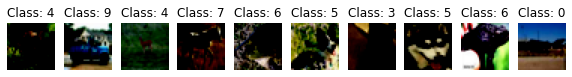

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

BATCH_SIZE = 32
EPOCHS = 10

train_dataset = datasets.CIFAR10(root = "../data/CIFAR_10",
                                  train = True,
                                  download = True,
                                  transform = transforms.Compose([                            # 불러오는 이미지 데이터에 전처리 및 augmentation을 다양하게 적용할 때 이용하는 메서드
                                    transforms.RandomHorizontalFlip(),                        # 해당 이미지를 50%의 확률로 좌우 반전하는 것을 의미
                                    transforms.ToTensor(),                                    # 0에서 1사이의 값으로 정규화하며 딥러닝 모델의 input으로 이용될 수 있도록 tensor 형태로 변환
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])) # totensor 형태로 전환된 이미지에 대해 또 다른 정규화를 진행하는 것을 의미
                                                                                              # 정규화를 진행할 때는 평균과 표준편차가 필요한데 rgb순으로 평균을 0.5씩 적용

test_dataset = datasets.CIFAR10(root = "../data/CIFAR_10",
                                train = False,
                                transform = transforms.Compose([
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                            batch_size = BATCH_SIZE,
                                            shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))
    plt.title('Class: ' + str(y_train[i].item()))

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 8, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3, padding = 1)
        self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.fc1 = nn.Linear(8 * 8 * 16, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        x = x.view(-1, 8 * 8 * 16)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x)
        return x

model = CNN().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

print(model)

def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item()))
            
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

## 4. CNN Archiecture
- imageNet: 이미지 분류 모델을 측정하기 위한 데이터로 가장 많이 사용되는 데이터셋. 
- network architecture: 과적합이나 gradient vanishing을 방지하는 activation함수, batch normalization, dropout, initialization, data augmentation 등등이 있다. 또한 네트워크를 깊게 쌓으면서 과적합을 방지하는 net architecture이 있다.
- LeNet: 최초의 CNN 모델. 32x32 input과 convolution 2개, pooling layer 2개, fully connected layer 3개를 가지고 있다.
- alexNet: 224x224 크기의 RGB 3 channel image를 input으로 사용. activation 함수는 ReLU를 사용.
- VGG: 3x3 convolution layer을 깊게 중첩한다.
- GoogLeNet: 구글이 제안한 모델로 google+net. inception 모듈이라는 개념을 사용. 기존의 CNN구조는 Convolution 다음의 pooling layer을 거치는 것이 일반적이나 inception modeld 은 한 layer 내에서 서로 다른 연산을 거친 후 feature map을 다시 합치는 방식. 이렇게 하면 한 feature map에서 여러 convolution을 적용할 수 있기에 작은 규모, 큰 규모의 feature을 한번에 학습할 수 있다. 또한 마지막 fully connected layer에서 GAP(global average pooling) 으로 대체해 파라미터의 수를 크게 줄이는 효과가 있다.
- ResNet: 마이크로소프트에서 제안한 모델. residual block이라는 개념을 도입했고, 이전의 layer의 feature map을 다음 layer의 feature map에 더해주는 개념. 네크워크가 깊어짐에 따라 뒤의 layer이 희석된다. 그래서 이전의 정보를 뒤에서도 함께 활용하는 개념이다.
- denseNet: resnet의 확장 버전. 이전 layer과 다음 layer에 skip connection을 적용하는 모델이라면 densenet은 모든 layer에 skip connection을 적용하는 모델이다. 첫번째 layer에 대한 정보를 두, 세번째, 마지막 layer에도 함께 학습시킨다.

Using PyTorch version: 1.9.0+cu111  Device: cpu


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data/CIFAR_10/cifar-10-python.tar.gz to ../data/CIFAR_10


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X_train: torch.Size([32, 3, 32, 32]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=

KeyboardInterrupt: ignored

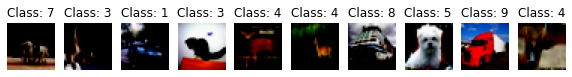

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)


BATCH_SIZE = 32
EPOCHS = 10

train_dataset = datasets.CIFAR10(root = "../data/CIFAR_10",
                                  train = True,
                                  download = True,
                                  transform = transforms.Compose([
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

test_dataset = datasets.CIFAR10(root = "../data/CIFAR_10",
                                train = False,
                                transform = transforms.Compose([
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                            batch_size = BATCH_SIZE,
                                            shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))
    plt.title('Class: ' + str(y_train[i].item()))

class BasicBlock(nn.Module):                                                                                    # 반복적으로 이용하는 block을 먼저 정의
    def __init__(self, in_planes, planes, stride = 1):                                                          # in_planes, planes, stride값을 인자로 받았을 때 basicblock의 인스턴스를 생성 stride는 기본적으로 1로 설정
        super(BasicBlock, self).__init__()         
        self.conv1 = nn.Conv2d(in_planes, planes,                                                               # basicblock이 input으로 이용되는 데이터의 채널 수를 의미하는 in_planes 값을 인자 값으로 받아준다. 
                                                                                                                # 특정 인스턴스를 생성할 때 입력해주는 값으로 이용하는 것이다. 
                                                                                                                # filter의 개수는 위에서 인자 값으로 입력된 planes 값을 통해 filter 개수가 정해진다.
                               kernel_size = 3,                                                                 # filter의 크기는 3x3크기로 설정하는 단계
                               stride = stride,                                                                 # filter가 움직이는 단위를 위에서 인자 값으로 받는 stride로 설정
                               padding = 1,                                                                     # filter가 이미지 위를 지나다니면서 convolution연산을 진행할 때 이미지 구석부분을 더 연산하기 위해 zero padding한다.
                               bias = False)                                                                    # 이미지의 각 픽셀 값, filter의 파라미터 값, convolutino 연산을 한 이후 bias 값을 더해줄 것인지를 선택
        self.bn1 = nn.BatchNorm2d(planes)                                                                       # batch normalization은 각 layer마다 input의 분포가 달라짐에 따라 학습속도가 현저히 느려지는 것을 방지
        self.conv2 = nn.Conv2d(planes, planes, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.shortcut = nn.Sequential()                                                                         # resnet의 특징인 shortcut을 정의하는 부분. shortcut는 기존의 값과 convolution 및 batch normalization한 결과를 더하는 과정
        if stride != 1 or in_planes != planes:                                                                  # stride값이 1이 아니거나 in_planes와 planes가 다르다면, 즉 두 번째 블록부터 적용되는 shortcut를 정의
            self.shortcut = nn.Sequential(                                                                      
                nn.Conv2d(in_planes, planes,                                                                    # 위와 같이 in_planes와 planes를 인자 값으로 받음. filter 개수는 동일할 것
                          kernel_size = 1,                                                                      # 적용되는 filter의 크기는 1이므로 1
                          stride = stride, bias = False),                                                       
                nn.BatchNorm2d(planes))
    
    def forward(self, x):                                                                                       # forward propagation을 정의
        out = F.relu(self.bn1(self.conv1(x)))                                                                   # self.conv1를 이용해 채널 수가 planes인 feature map을 생성하고 self.bn1을 이용해 batch normalization을 계산.
        out = self.bn2(self.conv2(out))                                                                         # 계산된 out을 self.conv2를 이용해 채널 개수가 planes feature map을 생성하고 self.bn2를 이용해 batch normalization을 계산
        out += self.shortcut(x)                                                                                 # out 과 sortcut를 이용해 더한다. 이 부분을 skip connectino이라 한다.
        out = F.relu(out)                                                                                       # 위의 결과값에 relu함수를 적용해 결괏값을 반환
        return out
    
class ResNet(nn.Module):                                                                                        # resnet 모델 구현
    def __init__(self, num_classes = 10):                                                                       # ResNet 클래스의 인스턴스를 생성했을 때 지니게 되는 성질을 정의해주는 메서드, 에측해야할 클래스를 10으로 정의
        super(ResNet, self).__init__()                                                       
        self.in_planes = 16                                                                                     #in_planes를 16으로 고정. 즉, ResNet 클래스의 인스턴스들은 in_planes값이 16으로 고정.convolution을 계산할 때 16 채널 수로 진행
        self.conv1 = nn.Conv2d(3, 16, kernel_size = 3, stride = 1, padding = 1, bias = False)                   # 여기서 self.conv1는 basicblock 내에서의 self.conv1와는 다른 메서드다. filter 개수는 16으로 정의
        self.bn1 = nn.BatchNorm2d(16)                                                                           # 벡터 크기가 16인 2차원 데이터에 적용할 수 있는 batch normalization 연산을 정의
        self.layer1 = self._make_layer(16, 2, stride = 1)                                                       # 첫번째 레이어를 생성한다.
        self.layer2 = self._make_layer(32, 2, stride = 2)                                                       # 두번째 레이어를 생성
        self.layer3 = self._make_layer(64, 2, stride = 2)                                                       
        self.linear = nn.Linear(64, num_classes)                                                                # make_layer 메서드를 정의하는 부분. planes, num_blocks, stride를 인자 값으로 받아 여러 층의 레이어를 구성해 반환하는 메서드
        
    def _make_layer(self, planes, num_blocks, stride):                                                          # make_layer를 이용할 때 인자 값으로 주어지는 stride를 이용해 stride범위를 basicblock마다 설정할 수 있도록 정의
        strides = [stride] + [1] * (num_blocks  - 1)                                                           
        layers = []                                                                                             # basicblock을 통해 생성된 결괏값을 추가하기 위해 빈 리스트를 정의
        for stride in strides:                                                                                  # stride 범위를 반복문의 범위로 지정
            layers.append(BasicBlock(self.in_planes, planes, stride))                                           
            self.in_planes = planes                                                                             # self.in_planes 값을 매번 업데이트해 self.in_planes를 planes 값으로 업데이트한다. shortcut를 계산하기 위함.
        return nn.Sequential(*layers)                                                                           # 여러 층으로 생성한 레이어를 nn.sequential 내에 정의해 반환
    
    def forward(self, x):                                                                                       # resnet 모델의 forward propagatoin을 정의
        out = F.relu(self.bn1(self.conv1(x)))                                                                   # self.conv1을 이용해 채널 수가 planes인 feature map을 생성하고 self.bn1을 이용해 batch normalization을 계산한다.
        out = self.layer1(out)                                                                                  # make_layer 메서드를 이용해 생성한 첫번째 레이어를 통과시킨다. 16채널을 input으로 받아 16채널을 output으로 계산하는 basicblock을 2개
        out = self.layer2(out)                                                                                  # 16채널을 input으로 받아 32채널을 output으로 계산하는 basicblock 1개, 32채널을 input으로 받아 32채널을 output으로 계산하는 basicblock을 1개 생성
        out = self.layer3(out)                                                                                  # 32채널을 input으로 받아 64채널을 output으로 계산하는 basicblock 1개, 64채널을 input으로 받아 64채널을 output으로 계산하는 basicblock을 1개 생성
        out = F.avg_pool2d(out, 8)                                                                              # feature map에 2차원의 average pooling을 이용해 8x8크기의 filter가 움직이면서 64개의 feature map 값의 평균을 계싼해 1개의 feature map으로 다운 샘플링
        out = out.view(out.size(0), -1)                                                                         # 1차원 벡터로 펼처줌
        out = self.linear(out)                                                                                  # 1차원 벡터를 10개의 노드로 구성된 fully connected layer와 연결해 최종적으로 10 크기의 벡터를 출력
        return out

model = ResNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

print(model)

def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item()))
            
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

In [ ]:
''' 6. PyTorch 내에서 제공하는 ResNet34 모델 불러온 후 FC 층 추가 및 Output 크기 설정하기 '''
import torchvision.models as models                                                       
model = models.resnet34(pretrained = False)                                               # models resnet34모델을 불러온다. 모델 구조가 imageNet 데이터에 대해 미리 학습된 파라미터 값을 함께 불러올 수 있다. 
                                                                                          # false이면 모델의 구조만 불러오고 모델 구조 내에 존재하는 파라미터는 특정 initializer에서 랜덤으로 샘플링한 값을 이용해 모델을 불러옴
                                                                                          # 이때 비슷한 모델끼리 분류하는 모델을 이용한다면 더 정확도 높은 모델을 구축할 수 있다.
num_ftrs = model.fc.in_features                                                           # models를 이용해 불러온 resner34모델에 대해 fully connected layer을 구성하고 있는 부분에 접근. 
                                                                                          # in-features는 resnet34 모델의 fully connected layer의 input에 해당하는 노드 수를 num_ftrs로 저장
model.fc = nn.Linear(num_ftrs, 10)                                                        # fully connected layer의 input에 해당하는 노드 수를 이용해 CIFAR-10 데이터의 클래스 수인 10개로 Output을 설정. 
                                                                                          # CIFAR-10을 분류하고자 하기에 최종 OUTPUT의 노드 수를 10개로 설정
model = model.cpu()

''' 11. IMAGENET 데이터로 학습이 된 ResNet34 모델을 불러온 후 Fine Tuning 해보기 '''
model = models.resnet34(pretrained = True)                                                # pretrained = true는 imageNet 데이터를 잘 분류할 수 있도록 학습된 파라미터를 resnet34 모델에 적용해 불러오는 것을 의미
num_ftrs = model.fc.in_features                                                           # CIFAR-10 데이터를 분류하기 위해 최종 output의 벡터를 10 크기로 설정해야 한다. 
                                                                                          # CIFAR-10 데이터의 클래스 종류는 10개이므로 각 클래스를 포현하는 원핫인코딩 값의 크기가 10이기 때문이다.
model.fc = nn.Linear(num_ftrs, 10)                                                  
model = model.cpu()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)                          

for epoch in range(1, EPOCHS + 1):                                                        # ImageNet 데이터에 학습이 완료된, 즉 학습을 통해 얻게 된 파라미터를 resnet34 모델의 초기 파라미터로 설정한 후 CIFAR-10 이미지 데이터를 10개의
    train(model, train_loader, optimizer, log_interval = 200)                             # 클래스로 분류할 수 있도록 기존 실습 내용과 동일한 환경으로 실험을 진행
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

## 5. Transfer Learning
강아지와 고양이를 구분하는 딥러닝 모델을 구축한다. 이때 앞에서 서술한 ImageNet 데이터를 미리 학습해 놓은 딥러닝 모델(pre-trained model)을 가져와 재학습시키는 방법을 사용한다. 이를 전이 학습(Transfer Learning)이라 한다. 이때 pre trained model을 로드한 후 fully connected layer 앞단 네트워크의 weight를 가져오고 fully connected layer을 디자인한다.

이때 fully connected layer도 그대로 사용하고 output layer만 디자인하기도 한다. pre trained model은 우리가 분류하고자 하는 문제보다 훨씬 더 큰 문제를 푸는 모델이기 떄문에 output layer의 dimension을 수정해야 한다. 그 후 우리가 보유한 데이터를 input으로 해 학습을 진행한다. 일반적으로 pre trained model의 fully connected layer 이전의 weight는 학습하지 않는다.

이때는 weight를 freezing한다고 표현하며 보유하고 데이터를 갖고는 fully connected layer 부분의 weight만 학습을 진행하는 것. 이 과정을 fine-tuning이라 한다. transfer learning은 보유한 데이터가 많지 않을 때 사용한다. 

Using PyTorch version: 1.8.1+cu101  Device: cuda


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


X_train: torch.Size([32, 3, 224, 224]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



Train Epoch: 1 [0/244 (0%)]	Train Loss: 0.644069
Train Epoch: 1 [160/244 (62%)]	Train Loss: 0.258888

[EPOCH: 1], 	Test Loss: 0.2474, 	Test Accuracy: 92.81 % 

Train Epoch: 2 [0/244 (0%)]	Train Loss: 0.168042
Train Epoch: 2 [160/244 (62%)]	Train Loss: 0.186289

[EPOCH: 2], 	Test Loss: 0.1930, 	Test Accuracy: 94.77 % 

Train Epoch: 3 [0/244 (0%)]	Train Loss: 0.080499
Train Epoch: 3 [160/244 (62%)]	Train Loss: 0.114115

[EPOCH: 3], 	Test Loss: 0.1879, 	Test Accuracy: 94.77 % 

Train Epoch: 4 [0/244 (0%)]	Train Loss: 0.103036
Train Epoch: 4 [160/244 (62%)]	Train Loss: 0.060239

[EPOCH: 4], 	Test Loss: 0.1970, 	Test Accuracy: 94.12 % 

Train Epoch: 5 [0/244 (0%)]	Train Loss: 0.049806
Train Epoch: 5 [160/244 (62%)]	Train Loss: 0.094379

[EPOCH: 5], 	Test Loss: 0.1868, 	Test Accuracy: 92.81 % 

Train Epoch: 6 [0/244 (0%)]	Train Loss: 0.031492
Train Epoch: 6 [160/244 (62%)]	Train Loss: 0.072770

[EPOCH: 6], 	Test Loss: 0.2170, 	Test Accuracy: 92.16 % 

Train Epoch: 7 [0/244 (0%)]	Train Loss:

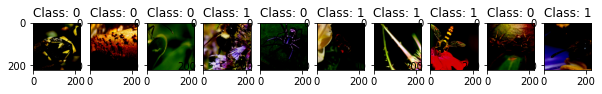

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

BATCH_SIZE = 32
EPOCHS = 10

''' 3. 개미와 벌을 분류하기 위해 개미 이미지 데이터와 벌 이미지 데이터 불러오기 (Train set, Test set 분리하기) '''
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),                                                 # 해당 이미지를 224 사이즈로 변경하되, 변경되는 이미지 픽셀 값은 랜덤으로 선택된다.즉, 이미지 내 랜덤으로 선택해 224 사이즈로 변경하는 것
        transforms.RandomHorizontalFlip(),                                                 # 해당 이미지를 50%확률로 좌우 반전
        transforms.ToTensor(),                                    
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
    'val': transforms.Compose([
        transforms.CenterCrop(224),                                                        # 해당 이미지를 224 사이즈로 변경하되 센터를 바꾼다. 
        transforms.Resize(256),                                                            # 모든 데이터를 256 사이즈로 변경한다.
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
}

data_dir = '/content/drive/MyDrive/data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir,x),                        # 이미지 데이터를 불러오는 것을 의미. ../data/hymenoptera_data 위치에 접근해 train 폴더와 val 폴더에 접근해 데이터를 불러온다. 
                                          data_transforms[x]) for x in ['train', 'val']}   # 기존 정의한 data_transforms의 학습 데이터셋에 이용되는 전처리 과정, 검증 데이터셋에 이용되는 전처리 과정을 각각 적용하는 것
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x],                           # 불러온 이미지를 mini-batch 단위로 구분하기 위해 utils.data.dataloader 함수를 이용. 각각 적용하기 위해 dictionary 구조를 사용
                                              batch_size = BATCH_SIZE,                     # mini-batch를 구성하는 데이터 개수는 기존에 정의한 batch-size로 설정
                                              num_workers = 0,                             # num_workers = 0 은 처리하는 프로세싱에 관련된 내용이며 멀티 프로세싱으로 진행하지 않는 한 0으로 기본값을 이용. 
                                                                                           # 프로세스를 동시에 처리하는 개수만큼 num_workers를 지정
                                              shuffle = True) for x in ['train', 'val']}   # 데이터 순서를 섞는 의미로 shuffle = true 

''' 4. 데이터 확인하기 (1) '''
for (X_train, y_train) in dataloaders['train']:                                            # 32개 이미지 데이터가 1개의 mini-batch를 구성하고 있고, 가로 224개, 세로 224개의 픽셀, 채널 3
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('on')
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))
    plt.title('Class: ' + str(y_train[i].item()))

''' 6. 불러온 특정 모델에 대하여 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의 '''
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item()))
  
''' 7. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의 '''
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():                                                                   # 평가에서는 gradient를 통해 파라미터 값이 업데이트되는 현상을 방지하기 위해 no.grad 메서드를 이용해 gradient의 흐름을 억제
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

''' 8. PyTorch 내에서 제공하는 미리 학습되지 않은 ResNet18 모델 불러온 후 Output 크기 설정하기 '''
import torchvision.models as models
model = models.resnet18(pretrained = False).cuda()                                          # model resnet18 모델을 불러와 imagenet데이터에 대해 미리 학습된 파라미터 값을 함께 불러올 수 있다. 
                                                                                            # false는 모델의 구조만 불러오고 initailzer에서 랜덤으로 샘플링한 값을 이용해 모델
num_ftrs = model.fc.in_features                                                             # model를 이용해 불러온 resnet34 모델에 대해 fully connected layer을 구성하고 있는 부분에 접근한다. in_features는 input에 해당하는 노드수를 지정
model.fc = nn.Linear(num_ftrs, 2)                                                           # fully connected layer의 input에 해당하는 노드 수를 이용해 새로운 레이어를 추가하고 개미와 벌을 분류하기 때문에 클래스 수가 2개로 output을 설정
model = model.cuda()

''' 9. Optimizer, Objective Function 설정하기 '''
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)                               # back propagation을 통해 파라미터를 업데이트할 때 optimizer을 정의. learning rate 값을 0.0001로 설정
criterion = nn.CrossEntropyLoss()                                                           # 모델의 output값, 원핫인코딩 값과 계산한 loss는 crossentropy를 이용해 계산하기 위해 설정

print(model)

''' 10. 미리 학습되지 않은 ResNet18 학습 실행하며 Train, Test set의 Loss 및 Test set Accuracy 확인하기 '''
for epoch in range(1, EPOCHS + 1):                                                          # 학습을 진행할 때는 전체 데이터셋을 이용하는 횟수만큼 반복문을 실행
    train(model, dataloaders["train"], optimizer, log_interval = 5)                         # 정의한 train함수 실행. model은 기존에 정의한 모델, train_loader은 학습 데이터, optimizer은 adam, log_interval은 mini-batch의 index를 이용해 과정을 출력
    test_loss, test_accuracy = evaluate(model, dataloaders["val"])                          # 정의한 evaluate 함수를 실행해 검증 데이터셋에 대한 loss값과 정확도를 저장
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))
    
''' 11. IMAGENET 데이터로 미리 학습이 된 ResNet18 모델을 불러온 후 개미, 벌 이미지 데이터에 맞게 Fine Tuning 해보기 '''
model = models.resnet18(pretrained = True)                                                  # 다른 데이터셋으로 학습해 얻게된 파라미터 값을 이용해 새로운 데이터에 학습하는 fine-tuning과정을 진행하기 위해 true로 설정
num_ftrs = model.fc.in_features                                                             # model을 이용해 불러온 resnet34모델에 대해 fully connected layer를 구성하고 있는 부분에 접근.
model.fc = nn.Linear(num_ftrs, 2)                                                           # 개미와 벌을 분류하기에 클래스는 2개로 지정. imagenet데이터의 클래스는 1000개이므로 최종 output 노드 수는 1000개로 설정하지만, 이때는 2개로 지정
model = model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)
EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
    train(model, dataloaders["train"], optimizer, log_interval = 5)
    valid_loss, valid_accuracy = evaluate(model, dataloaders["val"])
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, valid_loss, valid_accuracy))
    


In [ ]:
image_datasets = {x: datasets.ImageFolder("drive/MyDrive/hymenoptera_data", data_transforms[x]) for x in ['train', 'val']}
## https://blog.naver.com/gogsally/222257938679

FileNotFoundError: ignored